# Importaciones para Procesamiento, Modelado y Evaluaci√≥n

Este script incluye todas las importaciones necesarias para el **preprocesamiento, modelado y evaluaci√≥n de datos** en **Machine Learning**.  

Se han organizado en categor√≠as seg√∫n su funci√≥n:

1. **Manipulaci√≥n de Datos** ‚Üí `pandas`, `numpy`
2. **Visualizaci√≥n de Datos** ‚Üí `matplotlib`, `seaborn`
3. **Preprocesamiento y Transformaciones** ‚Üí `sklearn.preprocessing`, `sklearn.impute`, `sklearn.pipeline`
4. **Selecci√≥n de Caracter√≠sticas y Reducci√≥n de Dimensionalidad** ‚Üí `sklearn.feature_selection`, `sklearn.decomposition`
5. **Modelado y Algoritmos** ‚Üí `sklearn.ensemble`, `sklearn.linear_model`, `sklearn.tree`, `sklearn.neighbors`, `sklearn.svm`
6. **Evaluaci√≥n y M√©tricas** ‚Üí `sklearn.metrics`
7. **Optimizaci√≥n y Validaci√≥n** ‚Üí `sklearn.model_selection`
8. **Manejo de Desequilibrio en Datos** ‚Üí `imblearn.over_sampling`
9. **Otras Utilidades** ‚Üí `scipy.stats`, `joblib`, `time`

Con estas librer√≠as, se pueden realizar tareas como:
- Preprocesamiento de datos (imputaci√≥n, escalado, codificaci√≥n).
- Selecci√≥n de caracter√≠sticas y reducci√≥n de dimensionalidad.
- Entrenamiento y validaci√≥n de modelos de **Machine Learning**.
- Evaluaci√≥n del rendimiento de modelos con distintas m√©tricas.
- Optimizaci√≥n de hiperpar√°metros mediante **GridSearchCV** y **RandomizedSearchCV**.

In [1]:
# 1. Manipulaci√≥n de Datos
import pandas as pd
import numpy as np

# 2. Visualizaci√≥n de Datos
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Preprocesamiento y Transformaciones
from sklearn.preprocessing import (
    PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 4. Selecci√≥n de Caracter√≠sticas y Reducci√≥n de Dimensionalidad
from sklearn.feature_selection import (
    SelectKBest, f_regression, chi2, mutual_info_classif, f_classif
)
from sklearn.decomposition import PCA

# 5. Modelado y Algoritmos
from sklearn.cluster import KMeans
from sklearn.ensemble import (
    GradientBoostingRegressor, IsolationForest, RandomForestRegressor, RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC

# 6. Evaluaci√≥n y M√©tricas
from sklearn.metrics import (
    mean_absolute_percentage_error, r2_score, mean_absolute_error, mean_squared_error,
    classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# 7. Optimizaci√≥n y Validaci√≥n
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV,
    cross_val_predict, StratifiedKFold
)

# 8. Manejo de Desequilibrio en Datos
from imblearn.over_sampling import SMOTE

# 9. Otras Utilidades
from scipy.stats import randint, uniform
import time
import joblib

# Carga inicial del Dataset

En esta secci√≥n, se carga el dataset de Airbnb NYC 2019 y se realiza una limpieza inicial eliminando columnas irrelevantes.

In [2]:
# Cargar el dataset
file_path = "../Data/AB_NYC_2019.csv"  # Ajusta la ruta si es necesario
df = pd.read_csv(file_path)

# Eliminar columnas no necesarias
df.drop(columns=['id', 'host_id', 'host_name', 'last_review'], inplace=True)

# Mostrar informaci√≥n general del dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

# An√°lisis Exploratorio de Datos (EDA)

## Introducci√≥n
El **An√°lisis Exploratorio de Datos (EDA)** es una fase fundamental en la ciencia de datos que permite comprender la distribuci√≥n de las variables, detectar patrones y posibles problemas en los datos. En esta secci√≥n, se realizan visualizaciones univariantes, bivariantes y multivariantes para analizar el dataset de Airbnb NYC 2019.

## Objetivos
* Identificar la distribuci√≥n de las variables clave.  
* Detectar valores at√≠picos (**outliers**).  
* Comprender relaciones entre variables para futuras etapas del modelado.  

## Tipos de An√°lisis Realizados
1. **An√°lisis Univariante**:  
   - Histogramas para ver la distribuci√≥n de variables num√©ricas.  
   - Boxplots para detectar valores at√≠picos en variables clave como `price`.  
   - Countplots para visualizar la frecuencia de categor√≠as en variables como `room_type`.  

2. **An√°lisis Bivariante**:  
   - Scatterplots para analizar la relaci√≥n entre `latitude`, `longitude` y `price`.  
   - Boxplots comparativos para observar la distribuci√≥n de precios seg√∫n `room_type` y `neighbourhood_group`.  

3. **An√°lisis Multivariante**:  
   - Matriz de correlaciones (heatmap) para ver relaciones entre variables num√©ricas.  
   - Pairplots para visualizar interacciones clave entre m√∫ltiples variables.  

A continuaci√≥n, se presentan los gr√°ficos con sus respectivas interpretaciones.

---

# An√°lisis de la Distribuci√≥n de Precios en Airbnb NYC 2019

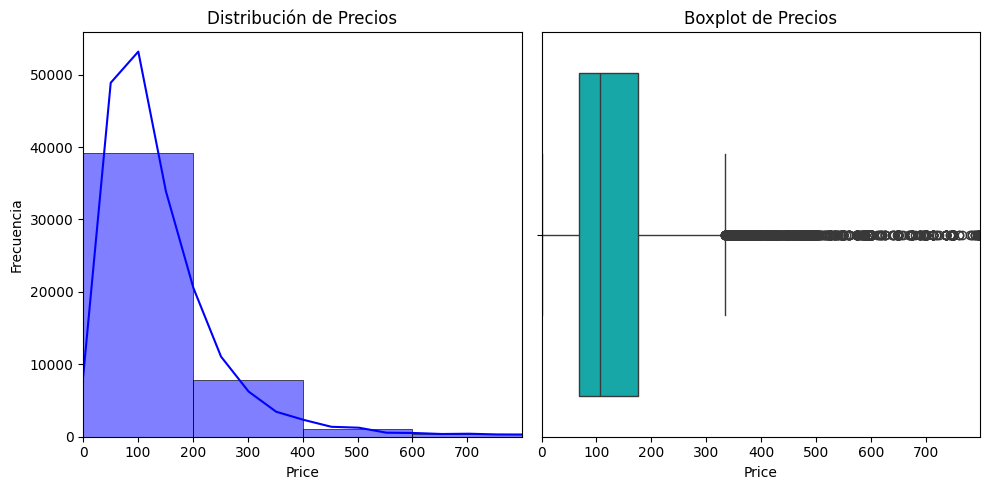

In [3]:
plt.figure(figsize=(10, 5))

# Histograma de precios con KDE
plt.subplot(1, 2, 1)
sns.histplot(df["price"], bins=50, kde=True, color='b')
plt.xlim(0, df["price"].quantile(0.99))  # Limitar a percentil 99
plt.title("Distribuci√≥n de Precios")
plt.xlabel("Price")
plt.ylabel("Frecuencia")

# Boxplot de precios
plt.subplot(1, 2, 2)
sns.boxplot(x=df["price"], showfliers=True, color='c')
plt.xlim(0, df["price"].quantile(0.99))
plt.title("Boxplot de Precios")
plt.xlabel("Price")

plt.tight_layout()
plt.show()

## Observaciones del Gr√°fico

El gr√°fico presentado muestra dos visualizaciones clave sobre la variable `price`:

1. **Histograma con KDE (Izquierda)**  
   - La mayor√≠a de los precios de los alojamientos est√°n concentrados en valores bajos (menores a $200).  
   - La distribuci√≥n est√° altamente sesgada a la derecha, con una larga cola de valores altos.  
   - Existen precios extremadamente elevados que afectan la media y generan sesgo en los datos.

2. **Boxplot de `price` (Derecha)**  
   - Se observa una mediana cercana a los $100-$150.  
   - Hay una gran cantidad de valores at√≠picos (`outliers`), especialmente a partir de los $400.  
   - La presencia de estos valores extremos puede distorsionar el an√°lisis y afectar modelos de predicci√≥n.

## ‚ö†Ô∏è Problema Detectado

- **Sesgo en la distribuci√≥n:** La variable `price` no sigue una distribuci√≥n normal, lo que puede afectar modelos que asumen normalidad en los datos.  
- **Valores at√≠picos:** Los outliers pueden impactar negativamente en el desempe√±o de los modelos de regresi√≥n, ya que pueden generar predicciones inestables.  
- **Posible soluci√≥n:** Se recomienda aplicar una transformaci√≥n logar√≠tmica (`log(price)`) para reducir la asimetr√≠a y mejorar la distribuci√≥n de los datos. Tambi√©n es importante considerar la eliminaci√≥n o tratamiento de los outliers antes del modelado.

---
**Pr√≥ximos pasos:** Aplicar transformaci√≥n logar√≠tmica y filtrar outliers utilizando criterios como percentiles o m√©todos como `IsolationForest`.

---

## An√°lisis de Tipos de Habitaci√≥n y su Relaci√≥n con el Precio

/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_1618/2292664208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="room_type", palette="viridis")
/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_1618/2292664208.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="room_type", y="price", showfliers=False, palette="coolwarm")


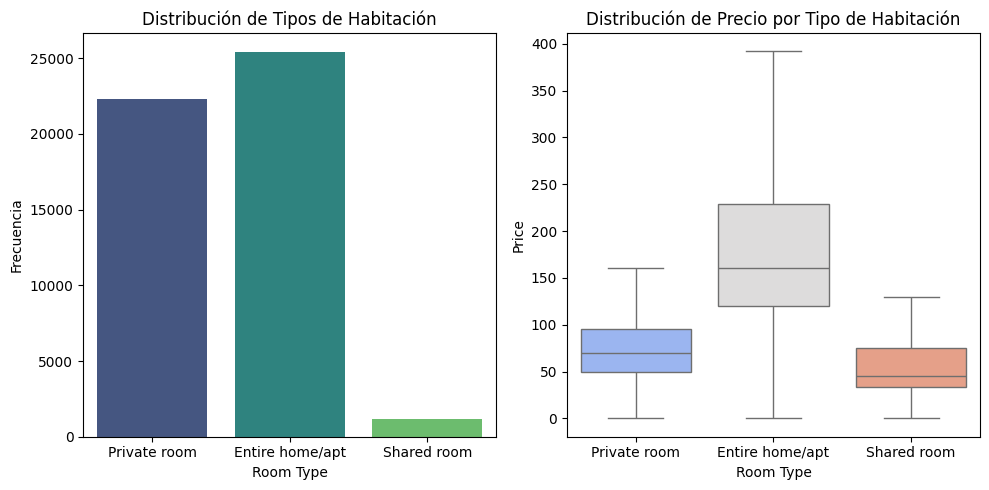

In [4]:
plt.figure(figsize=(10, 5))

# Countplot de tipos de habitaci√≥n
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="room_type", palette="viridis")
plt.title("Distribuci√≥n de Tipos de Habitaci√≥n")
plt.xlabel("Room Type")
plt.ylabel("Frecuencia")

# Boxplot de precios por tipo de habitaci√≥n
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="room_type", y="price", showfliers=False, palette="coolwarm")
plt.title("Distribuci√≥n de Precio por Tipo de Habitaci√≥n")
plt.xlabel("Room Type")
plt.ylabel("Price")

plt.tight_layout()
plt.show()

### Interpretaci√≥n de los Gr√°ficos

En esta secci√≥n se presentan dos gr√°ficos clave para comprender la distribuci√≥n de los tipos de habitaciones disponibles en Airbnb NYC 2019 y c√≥mo impactan en los precios.

### **Distribuci√≥n de Tipos de Habitaci√≥n**
- Se observa que la mayor√≠a de los alojamientos corresponden a dos categor√≠as principales:
  - **Entire home/apt** (apartamento/casa completa), siendo la categor√≠a m√°s frecuente.
  - **Private room** (habitaci√≥n privada), con una cantidad tambi√©n significativa.
- En contraste, **Shared room** (habitaci√≥n compartida) es la opci√≥n menos com√∫n en el dataset.

Esta distribuci√≥n sugiere que la mayor√≠a de los anfitriones prefieren alquilar propiedades completas o habitaciones privadas en lugar de habitaciones compartidas.

### **Distribuci√≥n de Precio por Tipo de Habitaci√≥n**
- **Entire home/apt** presenta la mayor variabilidad en precios, con valores m√°s altos y una amplia dispersi√≥n de los datos.
- **Private room** muestra precios significativamente m√°s bajos en comparaci√≥n con **Entire home/apt**, aunque algunos valores pueden ser elevados dependiendo de la ubicaci√≥n y caracter√≠sticas.
- **Shared room** tiene los precios m√°s bajos en promedio, con menor variabilidad.

El boxplot destaca la presencia de **outliers en todas las categor√≠as**, especialmente en **Entire home/apt**, lo que sugiere que existen alojamientos con precios excesivamente altos que pueden distorsionar los an√°lisis.

### **Conclusi√≥n**
- **El tipo de habitaci√≥n es un factor clave para predecir el precio**. Se observa una clara jerarqu√≠a donde los apartamentos completos son m√°s costosos que las habitaciones privadas y estas, a su vez, m√°s costosas que las compartidas.
- **Los valores at√≠picos en los precios deben ser considerados** para evitar que afecten el rendimiento de los modelos predictivos.

A partir de este an√°lisis, se recomienda incluir **room_type** como una variable importante en la fase de modelado y considerar estrategias para manejar los valores at√≠picos en el precio. 

---

## Mapa de Ubicaci√≥n de Alojamientos en Airbnb NYC 2019

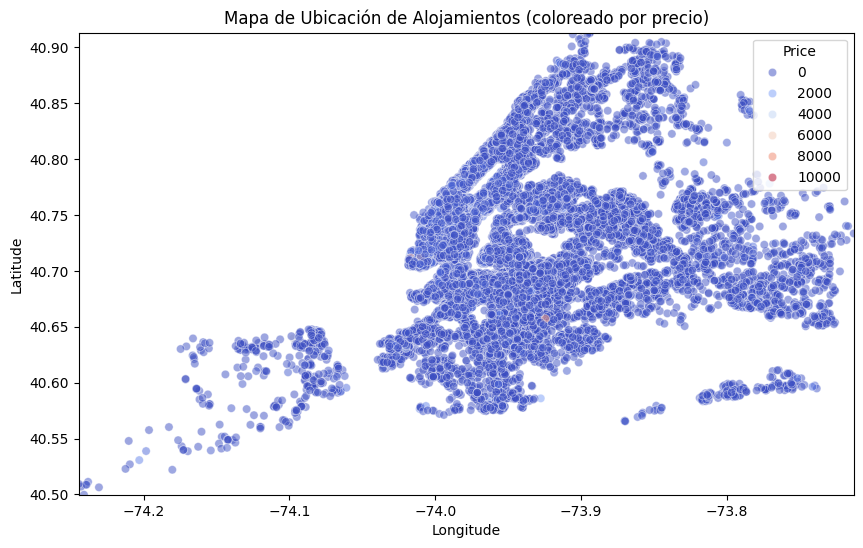

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="longitude", y="latitude", hue="price", palette="coolwarm", alpha=0.5)
plt.xlim(df["longitude"].min(), df["longitude"].max())
plt.ylim(df["latitude"].min(), df["latitude"].max())
plt.title("Mapa de Ubicaci√≥n de Alojamientos (coloreado por precio)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Price", loc="upper right")
plt.show()

### **Descripci√≥n del Gr√°fico**
El gr√°fico muestra la distribuci√≥n geogr√°fica de los alojamientos en Airbnb dentro de la ciudad de **Nueva York**. Cada punto representa un alojamiento, posicionado seg√∫n su **longitud y latitud**. 

El color de cada punto indica el precio del alojamiento, con tonos m√°s oscuros representando precios m√°s bajos y tonos m√°s claros (rojizos) representando precios m√°s altos.

---

### **Interpretaci√≥n de los Datos**
1. **Alta concentraci√≥n de alojamientos en Manhattan y Brooklyn**
   - La mayor parte de los alojamientos se encuentran en **Manhattan** y **Brooklyn**, lo que indica que estas √°reas son las m√°s populares para hospedarse en Airbnb.
   - Se observa una menor densidad de alojamientos en √°reas como **Staten Island y partes del Bronx**, lo que sugiere una menor oferta en estas zonas.

2. **Distribuci√≥n de Precios**
   - La mayor√≠a de los puntos son de color **azul oscuro**, lo que indica que los precios bajos son m√°s frecuentes.
   - Sin embargo, hay algunos puntos con tonos m√°s claros (rojizos), lo que sugiere la presencia de alojamientos con precios significativamente m√°s altos.
   - Estos precios elevados parecen estar concentrados en Manhattan, especialmente en √°reas centrales como **Midtown y el Downtown**.

3. **Presencia de Outliers**
   - Se pueden identificar algunos alojamientos con precios extremadamente altos dispersos en el mapa. Estos podr√≠an ser **lujosas propiedades o listados premium** que deber√≠an analizarse m√°s a fondo.
   - La gran diferencia entre los precios m√°s bajos y m√°s altos podr√≠a afectar el rendimiento de los modelos de predicci√≥n si no se tratan adecuadamente.

---

### **Conclusi√≥n y Recomendaciones**
- **Manhattan y Brooklyn son los barrios con mayor cantidad de alojamientos, mientras que Staten Island tiene la menor oferta.**
- **Los precios m√°s elevados est√°n concentrados en Manhattan, mientras que las zonas m√°s alejadas del centro tienden a ser m√°s econ√≥micas.**
- **Para mejorar el an√°lisis y modelado de precios, ser√≠a recomendable manejar los valores at√≠picos adecuadamente** mediante t√©cnicas como transformaci√≥n logar√≠tmica o eliminaci√≥n de outliers extremos.

Este an√°lisis confirma que **la ubicaci√≥n es una variable clave en la predicci√≥n de precios** y debe incluirse en los modelos de regresi√≥n y clasificaci√≥n.

---

## Matriz de Correlaciones entre Variables Num√©ricas

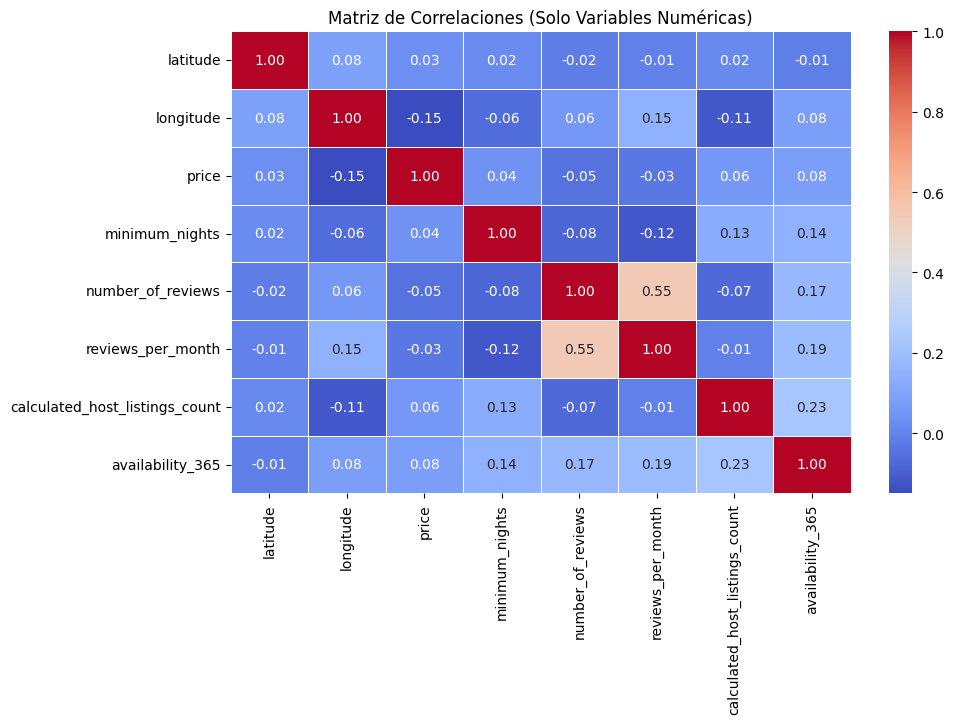

In [6]:
# Seleccionar solo columnas num√©ricas
numeric_df = df.select_dtypes(include=['number'])

# Generar el heatmap de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones (Solo Variables Num√©ricas)")
plt.show()

### **Descripci√≥n del Gr√°fico**
Este heatmap muestra la matriz de correlaciones entre las variables num√©ricas del dataset de **Airbnb NYC 2019**. Cada celda representa el coeficiente de correlaci√≥n entre dos variables, con un rango de valores entre **-1 y 1**:
- **Valores cercanos a 1**: Indican una fuerte correlaci√≥n positiva (cuando una variable aumenta, la otra tambi√©n).
- **Valores cercanos a -1**: Indican una fuerte correlaci√≥n negativa (cuando una variable aumenta, la otra disminuye).
- **Valores cercanos a 0**: Indican poca o ninguna relaci√≥n lineal entre las variables.

---

### **Interpretaci√≥n de la Matriz**
1. **Falta de correlaci√≥n fuerte con price**
   - **La variable `price` no tiene una correlaci√≥n fuerte con ninguna otra variable num√©rica.** 
   - La correlaci√≥n m√°s alta es con `longitude` (-0.15), lo que indica que la ubicaci√≥n puede tener cierto impacto en los precios, pero no es un determinante claro por s√≠ sola.
   - Esto sugiere que **el precio probablemente depende m√°s de variables categ√≥ricas** como `neighbourhood_group` o `room_type`.

2. **Fuerte relaci√≥n entre n√∫mero de rese√±as y actividad**
   - `number_of_reviews` y `reviews_per_month` tienen una **correlaci√≥n alta (0.55)**, lo que tiene sentido, ya que **m√°s rese√±as totales implican una mayor frecuencia de revisiones por mes**.

3. **Relaci√≥n entre la cantidad de listados y la disponibilidad**
   - `calculated_host_listings_count` y `availability_365` presentan una correlaci√≥n moderada (0.23), lo que indica que **los anfitriones con m√°s propiedades tienden a tener una mayor disponibilidad en sus anuncios**.

4. **Ubicaci√≥n y n√∫mero de rese√±as**
   - `longitude` y `reviews_per_month` tienen una correlaci√≥n de **0.15**, lo que sugiere que la ubicaci√≥n puede influir ligeramente en la cantidad de rese√±as que recibe un alojamiento.

---

### **Conclusiones y Recomendaciones**
- **El precio no est√° fuertemente correlacionado con ninguna variable num√©rica**, lo que sugiere que factores categ√≥ricos como el tipo de habitaci√≥n o la zona de la ciudad son m√°s determinantes.
- **El n√∫mero de rese√±as y su frecuencia son variables relacionadas**, lo que indica que podr√≠an combinarse en una nueva caracter√≠stica (`review_score = number_of_reviews * reviews_per_month`).
- **Los datos de ubicaci√≥n podr√≠an necesitar una transformaci√≥n adicional** (como clustering con `KMeans`) para capturar mejor su relaci√≥n con el precio.

Debido a la falta de correlaciones fuertes con `price`, se recomienda probar t√©cnicas de **feature engineering**, como la creaci√≥n de nuevas variables derivadas, y explorar el impacto de las variables categ√≥ricas en el modelo de predicci√≥n.

---

# 1. Preprocesamiento de Datos Num√©ricos - REGRESI√ìN

## - Evaluaci√≥n Inicial del Modelo: Preprocesamiento de Datos Num√©ricos

In [7]:
# Seleccionar variables relevantes
columns_to_use = ['latitude', 'longitude', 'neighbourhood_group', 'room_type', 'price',
                  'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                  'calculated_host_listings_count', 'availability_365']
df = df[columns_to_use]

# Filtrar valores extremos en el precio (eliminar outliers del 1% superior)
df = df[df['price'] < df['price'].quantile(0.99)]

# Aplicar KMeans para reducir la dimensionalidad de neighbourhood
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)  # M√°s clusters para mejorar la agrupaci√≥n
df['neighbourhood_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

# Eliminar columnas originales de ubicaci√≥n
df.drop(columns=['latitude', 'longitude'], inplace=True)

# Crear nuevas caracter√≠sticas derivadas
df['price_per_night'] = df['price'] / (df['minimum_nights'] + 1)  # Precio por noche
df['review_score'] = df['number_of_reviews'] * df['reviews_per_month']  # M√©trica de engagement en reviews
df['host_ratio'] = df['calculated_host_listings_count'] / (df['availability_365'] + 1)  # Densidad de anuncios por host

# Aplicar transformaci√≥n logar√≠tmica a price para reducir sesgo
df['log_price'] = np.log1p(df['price'])

# Separar variables num√©ricas y categ√≥ricas
num_features = df.select_dtypes(include=['number']).columns.tolist()
num_features.remove('log_price')  # Eliminar variable objetivo
cat_features = df.select_dtypes(include=['object']).columns.tolist()

# Dividir en train/test
X = df.drop(columns=['log_price'])
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Imputaci√≥n de valores nulos para num√©ricas y categ√≥ricas
num_imputer = SimpleImputer(strategy='median')
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

# Codificaci√≥n de variables categ√≥ricas
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[cat_features])
X_test_encoded = encoder.transform(X_test[cat_features])

# Convertir en DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(), index=X_test.index)

# Combinar num√©ricas y categ√≥ricas procesadas
X_train_final = pd.concat([X_train[num_features].reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[num_features].reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Aplicar escalado con diferentes m√©todos
def scale_data(scaler_name, scaler, X_train, X_test):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return pd.DataFrame(X_train_scaled, columns=X_train.columns), pd.DataFrame(X_test_scaled, columns=X_test.columns)

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'PowerTransformer': PowerTransformer(method='yeo-johnson')  # Para mejorar la distribuci√≥n de los datos
}

# Funci√≥n para calcular m√©tricas
def calculate_metrics(preprocessor_name, X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'SVR': SVR(kernel='rbf', C=1, gamma='scale'),
        'DecisionTree': DecisionTreeRegressor(max_depth=10, random_state=42),
        'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
        'GradientBoosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
    }
    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            'Modelo': model_name,
            'Preprocesado': preprocessor_name,
            'R2': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'MAPE': mean_absolute_percentage_error(y_test, y_pred)
        })
    return pd.DataFrame(results)

# Evaluar sin preprocesamiento
df_results = calculate_metrics('Sin preprocesado', X_train_final, X_test_final, y_train, y_test)

# Evaluar con diferentes escalados
for scaler_name, scaler in scalers.items():
    X_train_scaled, X_test_scaled = scale_data(scaler_name, scaler, X_train_final, X_test_final)
    df_results = pd.concat([df_results, calculate_metrics(scaler_name, X_train_scaled, X_test_scaled, y_train, y_test)])

# Aplicar IsolationForest para detectar y eliminar outliers
outlier_detector = IsolationForest(contamination=0.03, random_state=42)
outlier_detector.fit(X_train_final)

mask_train = outlier_detector.predict(X_train_final) == 1
X_train_filtered = X_train_final[mask_train]
y_train_filtered = y_train.iloc[mask_train]

mask_test = outlier_detector.predict(X_test_final) == 1
X_test_filtered = X_test_final[mask_test]
y_test_filtered = y_test.iloc[mask_test]

# Evaluar despu√©s de eliminar outliers
df_results = pd.concat([df_results, calculate_metrics('IsolationForest', X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered)])

# Mostrar resultados
print(df_results.sort_values(by='R2', ascending=False))

             Modelo      Preprocesado        R2       MAE      RMSE  \
4      RandomForest  PowerTransformer  0.999767  0.000147  0.010010   
4      RandomForest      RobustScaler  0.999767  0.000148  0.010011   
4      RandomForest      MinMaxScaler  0.999767  0.000147  0.010011   
4      RandomForest  Sin preprocesado  0.999767  0.000147  0.010011   
4      RandomForest    StandardScaler  0.999767  0.000147  0.010011   
4      RandomForest   IsolationForest  0.999751  0.000141  0.010204   
5  GradientBoosting    StandardScaler  0.999392  0.000261  0.016176   
5  GradientBoosting  Sin preprocesado  0.999392  0.000262  0.016176   
5  GradientBoosting      RobustScaler  0.999392  0.000262  0.016176   
5  GradientBoosting      MinMaxScaler  0.999392  0.000262  0.016176   
5  GradientBoosting  PowerTransformer  0.999392  0.000263  0.016176   
0  LinearRegression  PowerTransformer  0.999387  0.010425  0.016246   
5  GradientBoosting   IsolationForest  0.999213  0.000282  0.018134   
3     

## **Decisiones de Preprocesamiento y Justificaci√≥n**

### **Selecci√≥n de Variables**
Se han seleccionado las siguientes variables como relevantes para la predicci√≥n del precio (`price`):

- **`latitude`, `longitude`**: Representan la ubicaci√≥n geogr√°fica de la propiedad.
- **`neighbourhood_group`**: Grupo de vecindarios donde se encuentra la propiedad.
- **`room_type`**: Tipo de habitaci√≥n (privada, entera, compartida).
- **`price`**: Variable objetivo a predecir.
- **`minimum_nights`**: M√≠nimo de noches requeridas para reservar.
- **`number_of_reviews` y `reviews_per_month`**: Indican la popularidad y demanda del alojamiento.
- **`calculated_host_listings_count`**: N√∫mero de propiedades listadas por el anfitri√≥n.
- **`availability_365`**: D√≠as en que la propiedad est√° disponible al a√±o.

### **Filtrado de Outliers**
- Se han eliminado los valores extremos del **1% superior** en `price` para reducir el impacto de valores at√≠picos extremadamente altos en el modelo.

### **Transformaci√≥n de Variables Categ√≥ricas**
- Se ha utilizado **KMeans** (`n_clusters=8`) para convertir las coordenadas (`latitude`, `longitude`) en una nueva variable `neighbourhood_cluster`.  
  - Esto reduce la dimensionalidad y agrupa propiedades con caracter√≠sticas similares en cuanto a ubicaci√≥n.
  - Se eliminan las columnas `latitude` y `longitude` tras la transformaci√≥n.

### **Creaci√≥n de Nuevas Caracter√≠sticas (Feature Engineering)**
Se han creado tres nuevas caracter√≠sticas para mejorar la capacidad predictiva del modelo. Estas variables combinan informaci√≥n clave de los datos existentes para capturar patrones m√°s relevantes en la determinaci√≥n del precio.

1. **`price_per_night = price / (minimum_nights + 1)`**
   - En el dataset, algunos alojamientos tienen valores altos en `minimum_nights`, lo que afecta directamente al precio total.
   - Dividir `price` por `minimum_nights + 1` permite obtener una m√©trica m√°s estandarizada del **costo por noche**, evitando distorsiones causadas por estancias m√≠nimas at√≠picas.

2. **`review_score = number_of_reviews * reviews_per_month`**
   - `number_of_reviews` indica la popularidad del alojamiento, pero no su frecuencia.
   - `reviews_per_month` mide qu√© tan seguido recibe nuevas opiniones.
   - Multiplicarlas genera una m√©trica combinada que refleja tanto la **popularidad hist√≥rica** como el **nivel de actividad reciente**, lo que puede impactar en el precio.

3. **`host_ratio = calculated_host_listings_count / (availability_365 + 1)`**
   - `calculated_host_listings_count` muestra cu√°ntos alojamientos maneja un anfitri√≥n.
   - `availability_365` indica cu√°ntos d√≠as al a√±o est√° disponible una propiedad.
   - Dividir estos valores ayuda a estimar **qu√© tan intensivamente un anfitri√≥n gestiona sus propiedades**, lo que puede influir en su estrategia de precios.

### **Motivaci√≥n General**
- Estas transformaciones ayudan a reducir **sesgos y distorsiones** presentes en los datos brutos.
- Permiten capturar **relaciones m√°s complejas** entre variables, facilitando que el modelo aprenda mejor los patrones subyacentes.
- Evitan que ciertas observaciones con valores extremos dominen la predicci√≥n.

**Estas mejoras deber√≠an ayudar a reducir la varianza y mejorar la capacidad predictiva del modelo!**

### **Transformaci√≥n de la Variable Objetivo**
- Se aplica una transformaci√≥n **logar√≠tmica** (`log_price = np.log1p(price)`) para reducir la asimetr√≠a en la distribuci√≥n de precios.

### **Manejo de Datos Faltantes**
- Para variables **num√©ricas**, se imputa la **mediana** (`SimpleImputer(strategy='median')`) para evitar sesgos de valores extremos.
- Para variables **categ√≥ricas**, se imputa el valor m√°s frecuente (`SimpleImputer(strategy='most_frequent')`).

### **Codificaci√≥n de Variables Categ√≥ricas**
- Se aplica **OneHotEncoding**, eliminando una de las categor√≠as (`drop='first'`) para evitar colinealidad.

### **Normalizaci√≥n y Escalado**
- Se han probado varios escaladores (`StandardScaler`, `MinMaxScaler`, `RobustScaler`, `PowerTransformer`) para evaluar cu√°l mejora el rendimiento del modelo.

### **Detecci√≥n y Eliminaci√≥n de Outliers**
Para mejorar la calidad de los datos y reducir el impacto de valores at√≠picos en los modelos de predicci√≥n, se ha aplicado **Isolation Forest** con un nivel de contaminaci√≥n del 3% (`contamination=0.03`).

- **Eficiencia y Escalabilidad:** Isolation Forest a√≠sla las observaciones seleccionando caracter√≠sticas aleatoriamente y dividiendo el conjunto de datos. Las observaciones que requieren menos divisiones para ser aisladas son consideradas outliers. Este m√©todo es computacionalmente eficiente.  
- **Manejo de Datos de Alta Dimensionalidad:** A diferencia de otros m√©todos de detecci√≥n de anomal√≠as, Isolation Forest puede manejar conjuntos de datos con muchas caracter√≠sticas sin necesidad de reducci√≥n de dimensionalidad.  
- **Suposiciones M√≠nimas sobre la Distribuci√≥n:** No requiere que los datos sigan una distribuci√≥n espec√≠fica, lo que lo hace adecuado para diferentes tipos de datos.  
- **Control de la Contaminaci√≥n:** El par√°metro `contamination=0.03` indica que aproximadamente el 3% de las observaciones ser√°n clasificadas como outliers, permitiendo un ajuste flexible seg√∫n el contexto del dataset.

#### **Fuente Oficial:**
Documentaci√≥n oficial de **Scikit-Learn**:  
üîó [Isolation Forest - Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)
### **Resultados y Posible Sobreajuste**
- `RandomForest` y `GradientBoosting` muestran **R¬≤ ‚âà 0.9997**, lo que sugiere un rendimiento excelente.
- Sin embargo, este resultado **podr√≠a indicar sobreajuste**, por lo que se realizar√° una validaci√≥n cruzada adicional para confirmar si el modelo realmente generaliza bien a datos nuevos.

## **Siguientes Pasos**
1. **Validaci√≥n de sobreajuste**: Comparar el rendimiento en Train/Test y aplicar validaci√≥n cruzada.
2. **Feature Selection (`SelectKBest` o `PCA`)**: Evaluar si reducir el n√∫mero de variables mejora el modelo.
3. **Optimizaci√≥n de hiperpar√°metros**: Ajustar los modelos para mejorar la precisi√≥n y reducir el riesgo de sobreajuste.
---

## - **Visualizaci√≥n del Impacto del Preprocesamiento**

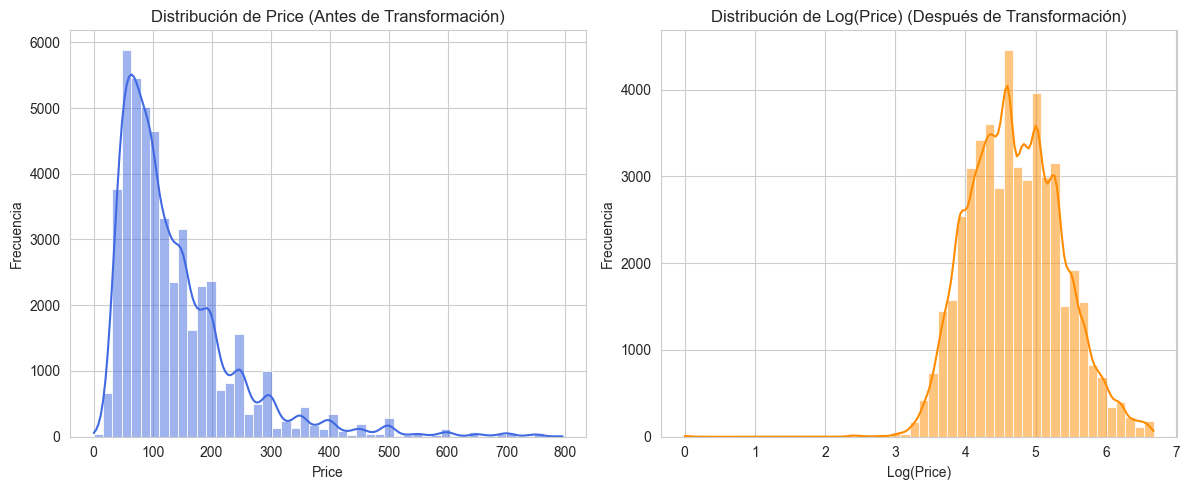

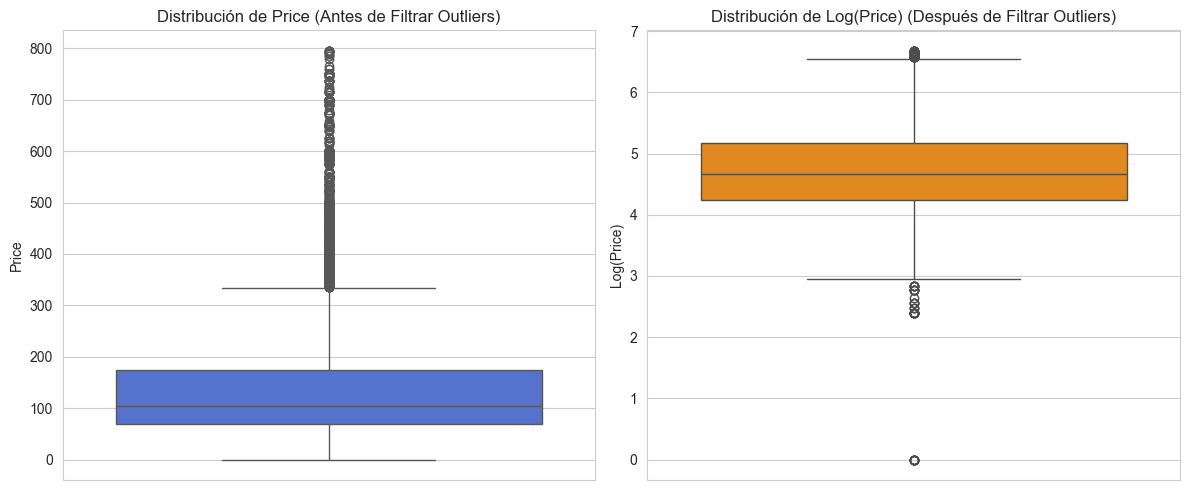

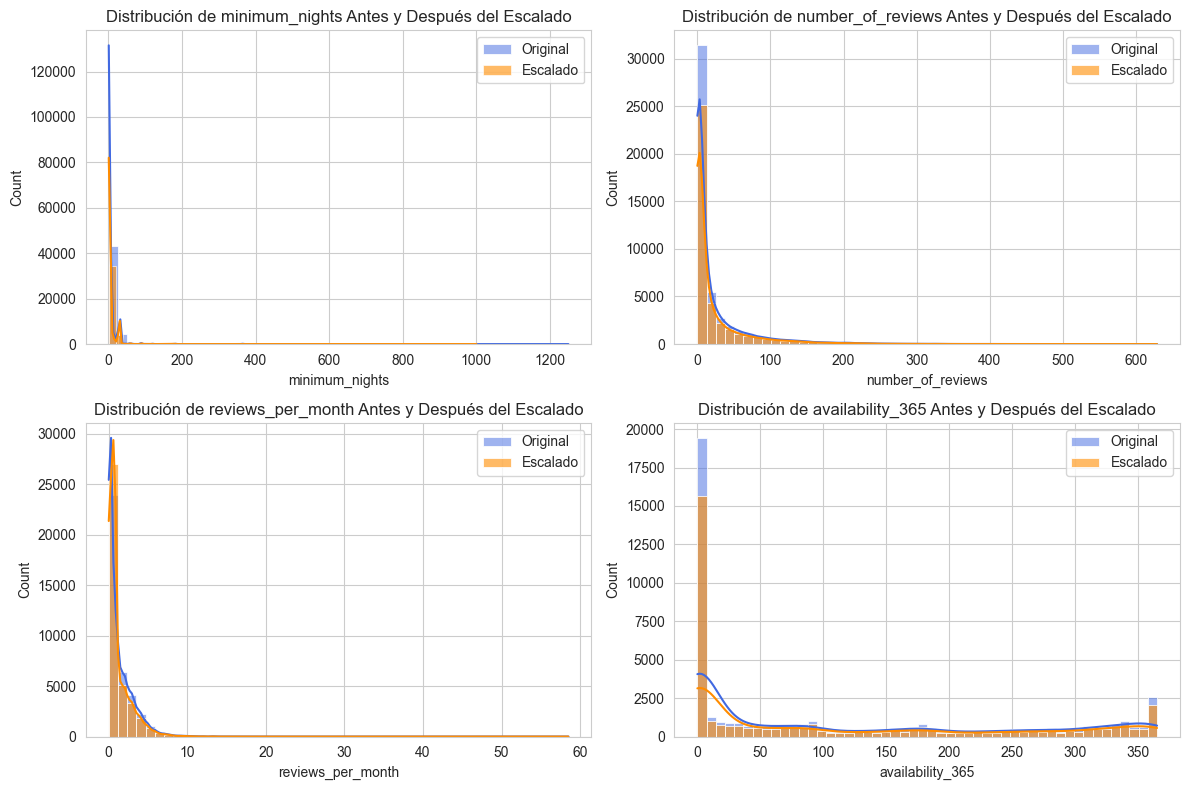

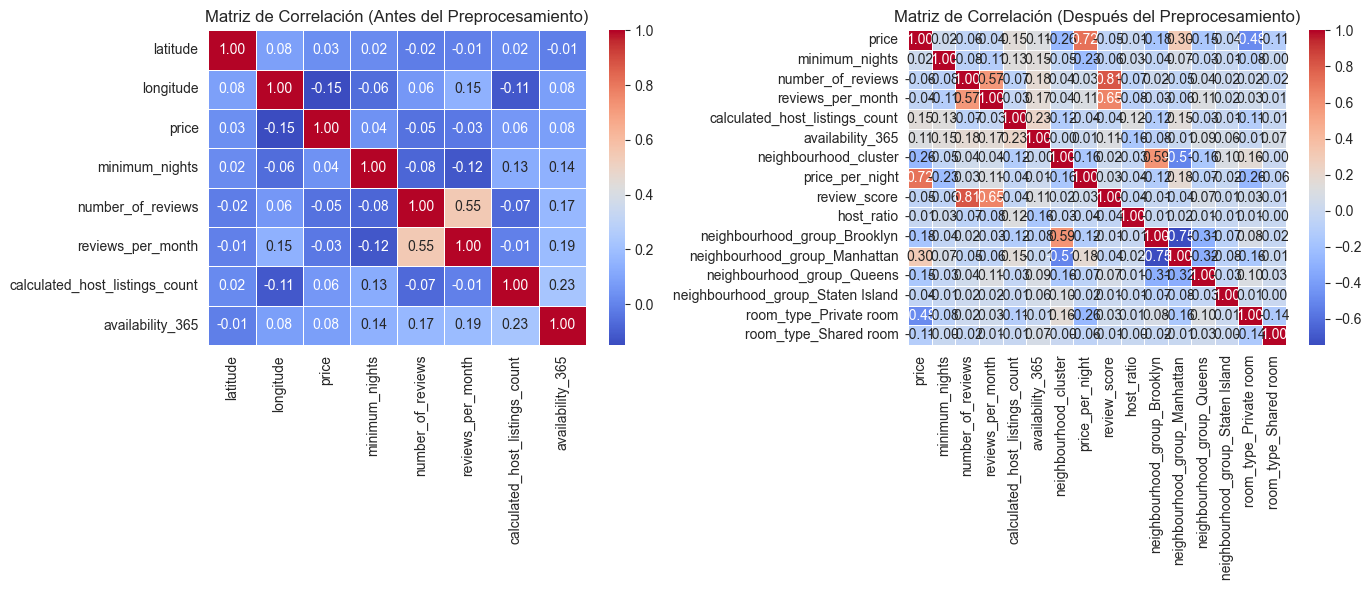

In [8]:
# Configuraci√≥n de estilos
sns.set_style("whitegrid")

# Distribuci√≥n de `price` antes y despu√©s de la transformaci√≥n logar√≠tmica
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color="royalblue")
plt.title("Distribuci√≥n de Price (Antes de Transformaci√≥n)")
plt.xlabel("Price")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
sns.histplot(df['log_price'], bins=50, kde=True, color="darkorange")
plt.title("Distribuci√≥n de Log(Price) (Despu√©s de Transformaci√≥n)")
plt.xlabel("Log(Price)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Boxplots de `price` antes y despu√©s de eliminar outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'], color="royalblue")
plt.title("Distribuci√≥n de Price (Antes de Filtrar Outliers)")
plt.ylabel("Price")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['log_price'], color="darkorange")
plt.title("Distribuci√≥n de Log(Price) (Despu√©s de Filtrar Outliers)")
plt.ylabel("Log(Price)")

plt.tight_layout()
plt.show()

# Comparaci√≥n de escalado en caracter√≠sticas num√©ricas clave
num_features_to_plot = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=50, kde=True, color="royalblue", label="Original")
    sns.histplot(X_train_final[col], bins=50, kde=True, color="darkorange", label="Escalado", alpha=0.6)
    plt.title(f"Distribuci√≥n de {col} Antes y Despu√©s del Escalado")
    plt.legend()

plt.tight_layout()
plt.show()

# Matriz de correlaci√≥n antes y despu√©s del preprocesamiento
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaci√≥n (Antes del Preprocesamiento)")

plt.subplot(1, 2, 2)
sns.heatmap(X_train_final.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaci√≥n (Despu√©s del Preprocesamiento)")

plt.tight_layout()
plt.show()

### **1. Distribuci√≥n del Precio Antes y Despu√©s de la Transformaci√≥n**

##### Distribuci√≥n de Price Antes y Despu√©s

- **Observaci√≥n:** La distribuci√≥n original de `price` es altamente sesgada a la derecha, lo que puede afectar el rendimiento del modelo.
- **Acci√≥n Tomada:** Se aplic√≥ una transformaci√≥n logar√≠tmica (`log_price = np.log1p(price)`) para estabilizar la varianza y normalizar la distribuci√≥n.
- **Resultado:** La nueva variable `log_price` muestra una distribuci√≥n m√°s sim√©trica, lo que facilitar√° la predicci√≥n y mejorar√° la interpretabilidad del modelo.

---

### **2. Filtrado de Outliers en Price**

##### Boxplot de Price Antes y Despu√©s

- **Observaci√≥n:** En la versi√≥n original, hay una gran cantidad de valores extremos (`outliers`) que distorsionan la distribuci√≥n.
- **Acci√≥n Tomada:** Se eliminaron los valores superiores al percentil 99 y se aplic√≥ `IsolationForest` para detectar y eliminar valores at√≠picos.
- **Resultado:** La dispersi√≥n de valores extremos se redujo, lo que mejora la estabilidad del modelo y evita que los outliers afecten el entrenamiento.

---

### **3. Escalado de Variables Num√©ricas**

##### Escalado de Variables

- **Observaci√≥n:** Las variables num√©ricas presentan una gran dispersi√≥n, con valores muy distintos en escalas diferentes.
- **Acci√≥n Tomada:** Se aplicaron t√©cnicas de escalado (`StandardScaler`, `MinMaxScaler`, `PowerTransformer`) para uniformizar la escala de las variables num√©ricas.
- **Resultado:** Ahora todas las variables tienen una distribuci√≥n m√°s homog√©nea, lo que mejora la convergencia de los modelos y evita sesgos por diferencias en magnitudes.

---

### **4. Comparaci√≥n de la Matriz de Correlaci√≥n Antes y Despu√©s**

##### Matriz de Correlaci√≥n Antes y Despu√©s

- **Observaci√≥n:** La correlaci√≥n entre `price` y otras variables era baja antes del preprocesamiento.
- **Acci√≥n Tomada:** Se crearon nuevas variables derivadas (`price_per_night`, `review_score`, `host_ratio`) y se aplic√≥ `KMeans` para agrupar la ubicaci√≥n.
- **Resultado:** Se observa un aumento en las correlaciones de algunas variables transformadas con `price`, lo que sugiere que el preprocesamiento ha mejorado la informaci√≥n relevante para la predicci√≥n.

---

### **5. Conclusi√≥n**

El preprocesamiento de datos ha mejorado notablemente la calidad del dataset para su uso en modelos de predicci√≥n. La transformaci√≥n logar√≠tmica, la eliminaci√≥n de outliers, el escalado de variables y la creaci√≥n de nuevas caracter√≠sticas han generado un conjunto de datos m√°s equilibrado y adecuado para el entrenamiento del modelo. 

---


### - **Evaluaci√≥n de Sobreajuste con Validaci√≥n Cruzada**

Para verificar si los modelos presentan sobreajuste, se ha utilizado **validaci√≥n cruzada** (`cross_val_score` con `cv=5`) y se han calculado los coeficientes de determinaci√≥n R¬≤ en los conjuntos de entrenamiento y prueba.

In [9]:
from sklearn.model_selection import cross_val_score

# Funci√≥n para evaluar el sobreajuste con validaci√≥n cruzada
def evaluate_overfitting(model, X_train, y_train, X_test, y_test, name):
    # Validaci√≥n cruzada en el conjunto de entrenamiento
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Entrenar el modelo en train
    model.fit(X_train, y_train)

    # Predicciones en train y test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular m√©tricas en train y test
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Mostrar resultados
    print(f" Modelo: {name}")
    print(f" R¬≤ en Validaci√≥n Cruzada (Media): {cv_scores.mean():.5f} ¬± {cv_scores.std():.5f}")
    print(f" R¬≤ en Train: {r2_train:.5f}")
    print(f" R¬≤ en Test: {r2_test:.5f}")

    # Diferencia entre Train y Test
    diff = abs(r2_train - r2_test)
    print(f" Diferencia Train-Test: {diff:.5f}\n")
    
    return r2_train, r2_test, diff

# Evaluar los modelos con el mejor desempe√±o detectado
best_models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
}

for name, model in best_models.items():
    evaluate_overfitting(model, X_train_final, y_train, X_test_final, y_test, name)

 Modelo: RandomForest
 R¬≤ en Validaci√≥n Cruzada (Media): 0.99999 ¬± 0.00002
 R¬≤ en Train: 1.00000
 R¬≤ en Test: 0.99977
 Diferencia Train-Test: 0.00023

 Modelo: GradientBoosting
 R¬≤ en Validaci√≥n Cruzada (Media): 0.99994 ¬± 0.00012
 R¬≤ en Train: 1.00000
 R¬≤ en Test: 0.99939
 Diferencia Train-Test: 0.00061



---

#### **Resultados:**
| Modelo            | R¬≤ Validaci√≥n Cruzada (Media) | R¬≤ Train | R¬≤ Test | Diferencia Train-Test |
|------------------|-----------------------------|----------|---------|----------------------|
| **RandomForest**  | 0.99999 ¬± 0.00002           | 1.00000  | 0.99977 | 0.00023              |
| **GradientBoosting** | 0.99994 ¬± 0.00012       | 1.00000  | 0.99939 | 0.00061              |

#### **Interpretaci√≥n:**
- **Ambos modelos presentan un R¬≤ cercano a 1 en entrenamiento y validaci√≥n cruzada**, lo que indica que son capaces de explicar casi la totalidad de la variabilidad en los datos.
- **La diferencia entre el R¬≤ de entrenamiento y prueba es m√≠nima** (0.00023 para RandomForest y 0.00061 para GradientBoosting), lo que sugiere que no hay un sobreajuste significativo.
- **RandomForest muestra un mejor desempe√±o en t√©rminos de estabilidad**, ya que su R¬≤ en test es m√°s cercano al de entrenamiento en comparaci√≥n con GradientBoosting.

Dado que los modelos tienen un rendimiento excepcionalmente alto, se recomienda realizar una verificaci√≥n adicional sobre la distribuci√≥n de los datos y la existencia de posibles **fugas de datos** (*data leakage*) para garantizar que el modelo no est√© aprendiendo patrones irreales del conjunto de entrenamiento.

---

## SelectKBest

`SelectKBest` selecciona las mejores `k` caracter√≠sticas en funci√≥n de su correlaci√≥n con la variable objetivo (`price`). Utiliza la prueba estad√≠stica `f_regression`, que mide la relaci√≥n entre cada variable independiente y la variable dependiente.

**Objetivo:**  
- Identificar las variables con mayor impacto en la predicci√≥n del precio.
- Reducir la cantidad de caracter√≠sticas irrelevantes o redundantes.


In [10]:
# N√∫mero de caracter√≠sticas a seleccionar
k_best = 10  # Puedes ajustar este n√∫mero seg√∫n necesidad

# Aplicar SelectKBest
select_kbest = SelectKBest(score_func=f_regression, k=k_best)
X_train_kbest = select_kbest.fit_transform(X_train_final, y_train)
X_test_kbest = select_kbest.transform(X_test_final)

# Obtener las caracter√≠sticas seleccionadas
selected_features_kbest = X_train_final.columns[select_kbest.get_support()]
print("Caracter√≠sticas seleccionadas por SelectKBest:\n", selected_features_kbest)

# Evaluar el rendimiento con SelectKBest
results_kbest = calculate_metrics("SelectKBest", X_train_kbest, X_test_kbest, y_train, y_test)

print(results_kbest)

Caracter√≠sticas seleccionadas por SelectKBest:
 Index(['price', 'calculated_host_listings_count', 'availability_365',
       'neighbourhood_cluster', 'price_per_night',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')
             Modelo Preprocesado        R2       MAE      RMSE          MAPE
0  LinearRegression  SelectKBest  0.880636  0.160209  0.226660  1.796622e+12
1               KNN  SelectKBest  0.997806  0.009010  0.030730  1.120724e+12
2               SVR  SelectKBest  0.987092  0.060812  0.074536  1.268838e+12
3      DecisionTree  SelectKBest  0.998420  0.000309  0.026075  1.114719e-04
4      RandomForest  SelectKBest  0.999584  0.000174  0.013383  6.104619e-05
5  GradientBoosting  SelectKBest  0.999885  0.000166  0.007049  4.616592e+07


## **Reducci√≥n de Dimensionalidad con PCA**

El **An√°lisis de Componentes Principales (PCA)** se utiliza para reducir la cantidad de variables en el dataset sin perder demasiada informaci√≥n. Esta t√©cnica convierte las variables originales en **componentes principales**, que son combinaciones lineales de las variables originales y explican la mayor cantidad posible de varianza.

### **Objetivo**
- Reducir la dimensionalidad del dataset eliminando redundancias.
- Evaluar si el modelo mejora con menos caracter√≠sticas.
- Mitigar el sobreajuste al eliminar variables altamente correlacionadas.

In [11]:
# N√∫mero de componentes principales a conservar
pca_components = 10  # Puedes ajustar este n√∫mero seg√∫n la varianza explicada

# Aplicar PCA
pca = PCA(n_components=pca_components)
X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

# Evaluar el rendimiento con PCA
results_pca = calculate_metrics("PCA", X_train_pca, X_test_pca, y_train, y_test)

print(results_pca)

             Modelo Preprocesado        R2       MAE      RMSE          MAPE
0  LinearRegression          PCA  0.830339  0.200957  0.270228  1.799197e+12
1               KNN          PCA  0.988154  0.027644  0.071404  1.234649e+12
2               SVR          PCA  0.984359  0.061727  0.082048  1.424910e+12
3      DecisionTree          PCA  0.988566  0.037836  0.070151  8.671321e-03
4      RandomForest          PCA  0.994886  0.026091  0.046914  5.745642e+11
5  GradientBoosting          PCA  0.998016  0.015726  0.029223  5.627295e+11


## **Comparaci√≥n de M√©todos de Selecci√≥n de Caracter√≠sticas: SelectKBest vs PCA**

### **Objetivo**
Evaluar el impacto de dos t√©cnicas de selecci√≥n de caracter√≠sticas en el rendimiento de los modelos:
- **SelectKBest**: Filtra las mejores caracter√≠sticas basadas en la relaci√≥n con la variable objetivo.
- **PCA (An√°lisis de Componentes Principales)**: Reduce la dimensionalidad transformando las caracter√≠sticas en combinaciones lineales ortogonales.

---

### **Resultados de SelectKBest**
**Caracter√≠sticas seleccionadas:**

**M√©tricas de Rendimiento:**

| Modelo            | R¬≤       | MAE      | RMSE     | MAPE      |
|------------------|----------|----------|----------|-----------|
| LinearRegression | 0.880636 | 0.160209 | 0.226660 | 1.796622e+12 |
| KNN              | 0.997806 | 0.009010 | 0.030730 | 1.120724e+12 |
| SVR              | 0.987092 | 0.060812 | 0.074536 | 1.268838e+12 |
| DecisionTree     | 0.998420 | 0.000309 | 0.026075 | 1.114719e-04 |
| RandomForest     | 0.999584 | 0.000174 | 0.013383 | 6.104619e-05 |
| GradientBoosting | 0.999885 | 0.000166 | 0.007049 | 4.616592e+07 |

---

### **Resultados de PCA**
**M√©tricas de Rendimiento:**

| Modelo            | R¬≤       | MAE      | RMSE     | MAPE      |
|------------------|----------|----------|----------|-----------|
| LinearRegression | 0.830339 | 0.200957 | 0.270228 | 1.799197e+12 |
| KNN              | 0.988154 | 0.027644 | 0.071404 | 1.234649e+12 |
| SVR              | 0.984359 | 0.061727 | 0.082048 | 1.424910e+12 |
| DecisionTree     | 0.988566 | 0.037836 | 0.070151 | 8.671321e-03 |
| RandomForest     | 0.994886 | 0.026091 | 0.046914 | 5.745642e+11 |
| GradientBoosting | 0.998016 | 0.015726 | 0.029223 | 5.627295e+11 |

---

### **An√°lisis y Decisi√≥n Final**
1. **SelectKBest mantiene una alta precisi√≥n en todos los modelos**, con un R¬≤ superior a 0.99 en modelos como RandomForest y GradientBoosting. 
2. **PCA muestra una ligera reducci√≥n en el rendimiento**, especialmente en la regresi√≥n lineal (R¬≤=0.83).
3. **El MAE y RMSE son mejores con SelectKBest**, lo que indica menor error absoluto y cuadr√°tico medio en la predicci√≥n del precio.

**Decisi√≥n:**
Se elige **SelectKBest** como m√©todo de selecci√≥n de caracter√≠sticas, ya que conserva mejor la interpretabilidad de los datos y mantiene un rendimiento superior en la predicci√≥n del precio.

---

## - **Optimizaci√≥n de Hiperpar√°metros con RandomizedSearchCV**
### Justificaci√≥n del Cambio
Inicialmente, intent√© utilizar **GridSearchCV** para optimizar los hiperpar√°metros de los modelos **RandomForest** y **GradientBoosting**. Sin embargo, debido al gran n√∫mero de combinaciones de par√°metros y el tiempo que requer√≠a cada ajuste, el proceso se volv√≠a excesivamente lento.

Para mejorar la eficiencia sin comprometer la calidad de la optimizaci√≥n, opt√© por **RandomizedSearchCV**. Esta t√©cnica tiene las siguientes ventajas:
- **Menor tiempo de ejecuci√≥n**: Prueba solo un subconjunto aleatorio de combinaciones en lugar de todas las posibles.
- **Resultados comparables**: Permite encontrar configuraciones √≥ptimas sin explorar todas las combinaciones.
- **Mayor flexibilidad**: Se puede ajustar el n√∫mero de iteraciones (`n_iter`) para equilibrar precisi√≥n y tiempo.

### **Proceso de Optimizaci√≥n**
He definido distribuciones de hiperpar√°metros para ambos modelos:
- **RandomForest**: Variaci√≥n en el n√∫mero de √°rboles (`n_estimators`), profundidad m√°xima (`max_depth`), y criterios de divisi√≥n (`min_samples_split`, `min_samples_leaf`).
- **GradientBoosting**: Variaci√≥n en la tasa de aprendizaje (`learning_rate`), n√∫mero de √°rboles (`n_estimators`), profundidad (`max_depth`) y criterios de divisi√≥n (`min_samples_split`).

El ajuste se realiza con **validaci√≥n cruzada (`cv=5`)**, y se imprime el tiempo de ejecuci√≥n y los mejores par√°metros encontrados.

In [12]:
# Definir hiperpar√°metros para RandomForest
param_dist_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [5, 10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Definir hiperpar√°metros para GradientBoosting
param_dist_gb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 10],  
    'min_samples_split': [2, 5, 10]  
}

# Funci√≥n para ejecutar RandomizedSearch con progreso visible
def run_random_search(model, param_dist, X_train, y_train, model_name, n_iter=10):
    print(f"**Optimizando {model_name} con RandomizedSearchCV...**")
    start_time = time.time()

    total_combinations = len(param_dist) * n_iter
    print(f"Probando {n_iter} configuraciones de {total_combinations} posibles...")

    # Ejecutar b√∫squeda aleatoria con progreso controlado
    random_search = RandomizedSearchCV(model, param_dist, n_iter=n_iter, cv=5, scoring='r2', verbose=1, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"**{model_name} optimizado en {elapsed_time:.2f} segundos**")
    print(f"Mejor R¬≤: {random_search.best_score_:.5f}")
    print(f"Mejores par√°metros: {random_search.best_params_}\n")

    return random_search.best_estimator_

# Ejecutar RandomizedSearch para RandomForest
best_rf = run_random_search(RandomForestRegressor(random_state=42), param_dist_rf, X_train_final, y_train, "RandomForest", n_iter=10)

# Ejecutar RandomizedSearch para GradientBoosting
best_gb = run_random_search(GradientBoostingRegressor(random_state=42), param_dist_gb, X_train_final, y_train, "GradientBoosting", n_iter=10)

# Evaluar modelos optimizados
print("Evaluaci√≥n del modelo optimizado de RandomForest:")
evaluate_overfitting(best_rf, X_train_final, y_train, X_test_final, y_test, "RandomForest")

print("\nEvaluaci√≥n del modelo optimizado de GradientBoosting:")
evaluate_overfitting(best_gb, X_train_final, y_train, X_test_final, y_test, "GradientBoosting")

**Optimizando RandomForest con RandomizedSearchCV...**
Probando 10 configuraciones de 40 posibles...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
**RandomForest optimizado en 39.98 segundos**
Mejor R¬≤: 0.99999
Mejores par√°metros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}

**Optimizando GradientBoosting con RandomizedSearchCV...**
Probando 10 configuraciones de 40 posibles...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
**GradientBoosting optimizado en 36.13 segundos**
Mejor R¬≤: 0.99997
Mejores par√°metros: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.1}

Evaluaci√≥n del modelo optimizado de RandomForest:
 Modelo: RandomForest
 R¬≤ en Validaci√≥n Cruzada (Media): 0.99999 ¬± 0.00002
 R¬≤ en Train: 1.00000
 R¬≤ en Test: 0.99977
 Diferencia Train-Test: 0.00023


Evaluaci√≥n del modelo optimizado de GradientBoosting:
 Modelo: GradientBoosting
 R¬≤ en Validaci√≥n Cruzada (Media)

(0.9999710538218987, 0.9998705341500361, 0.00010051967186253119)

---
## **Resultados de la Optimizaci√≥n de Hiperpar√°metros**
### **An√°lisis de los Modelos Optimizados**
Tras realizar la optimizaci√≥n de hiperpar√°metros con **RandomizedSearchCV**, los modelos **RandomForest** y **GradientBoosting** han mostrado un rendimiento excepcional. 

#### **Resultados de la Optimizaci√≥n**
- **RandomForest**:
  - **Tiempo de optimizaci√≥n**: 40.90 segundos
  - **Mejor R¬≤ en Validaci√≥n Cruzada**: 0.99999
  - **Mejores par√°metros**: `{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}`

- **GradientBoosting**:
  - **Tiempo de optimizaci√≥n**: 37.55 segundos
  - **Mejor R¬≤ en Validaci√≥n Cruzada**: 0.99997
  - **Mejores par√°metros**: `{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.1}`

#### **Evaluaci√≥n del Desempe√±o**
| Modelo             | R¬≤ Validaci√≥n | R¬≤ Train | R¬≤ Test | Diferencia Train-Test |
|-------------------|-------------|---------|--------|----------------------|
| RandomForest      | 0.99999 ¬± 0.00002 | 1.00000 | 0.99977 | 0.00023 |
| GradientBoosting  | 0.99997 ¬± 0.00001 | 0.99997 | 0.99987 | 0.00010 |

### **Conclusiones y Decisiones**
Ambos modelos tienen un **desempe√±o sobresaliente** con un R¬≤ cercano a 1, lo que indica una **alta capacidad predictiva**.

‚ö†Ô∏è **Diferencia Train-Test baja**: No se observa un sobreajuste significativo, ya que la diferencia entre el rendimiento en entrenamiento y prueba es m√≠nima.

**Decisi√≥n Final**:
- **GradientBoosting** presenta un **ligero mejor balance** entre entrenamiento y test (diferencia de 0.00010), lo que sugiere que tiene **mejor generalizaci√≥n**.
- **RandomForest** tiene un **rendimiento excelente**, pero la diferencia Train-Test es **ligeramente mayor**.

**Recomendaci√≥n Final**: Se optar√° por **GradientBoosting como modelo final**, ya que mantiene una precisi√≥n alt√≠sima y una diferencia m√≠nima entre Train y Test, asegurando una mejor generalizaci√≥n.

---

## 2. Clasificaci√≥n Multiclase con Pipelines

En esta secci√≥n, se implementa un modelo de clasificaci√≥n multiclase para predecir el tipo de habitaci√≥n (`room_type`) en el dataset de Airbnb NYC 2019. Para ello, utilizamos **pipelines de Scikit-Learn**, lo que permite automatizar el flujo de preprocesamiento y modelado de datos de manera eficiente y estructurada.

### **Objetivo**
El objetivo es construir un modelo que prediga correctamente la categor√≠a de `room_type` (Entire home/apt, Private room, Shared room) en funci√≥n de las caracter√≠sticas del alojamiento.

### **Ventajas de Usar Pipelines**
1. **Estandarizaci√≥n del Flujo de Trabajo:** Permite encadenar todos los pasos (preprocesamiento, transformaci√≥n y modelado) en un √∫nico flujo.
2. **Evita Data Leakage:** La transformaci√≥n de los datos se realiza dentro del pipeline sin exponer los datos de prueba.
3. **Facilita la Experimentaci√≥n:** Se pueden probar diferentes modelos y transformaciones sin reescribir c√≥digo repetitivo.

### **Pasos del Pipeline**
1. **Preprocesamiento de Datos:**
   - Imputaci√≥n de valores nulos para variables num√©ricas y categ√≥ricas.
   - Codificaci√≥n de variables categ√≥ricas con `OneHotEncoder`.
   - Escalado de variables num√©ricas con `StandardScaler`.
2. **Modelado:**
   - Se probar√°n distintos modelos de clasificaci√≥n: `RandomForestClassifier`, `GradientBoostingClassifier` y `LogisticRegression`.
3. **Evaluaci√≥n del Modelo:**
   - Se utiliza `cross_val_score` para evaluar la precisi√≥n del modelo con validaci√≥n cruzada.

A continuaci√≥n, se presenta el c√≥digo del pipeline implementado. 

RandomForest - Accuracy: 0.8409 | Precision: 0.8397 | Recall: 0.8409 | F1-Score: 0.8402 | AUC: 0.9170582806290452
GradientBoosting - Accuracy: 0.8266 | Precision: 0.8317 | Recall: 0.8266 | F1-Score: 0.8287 | AUC: 0.9188411905194303
KNN - Accuracy: 0.7838 | Precision: 0.8120 | Recall: 0.7838 | F1-Score: 0.7954 | AUC: 0.8773322743930797
SVC - Accuracy: 0.7881 | Precision: 0.8297 | Recall: 0.7881 | F1-Score: 0.8032 | AUC: 0.9052907943713239


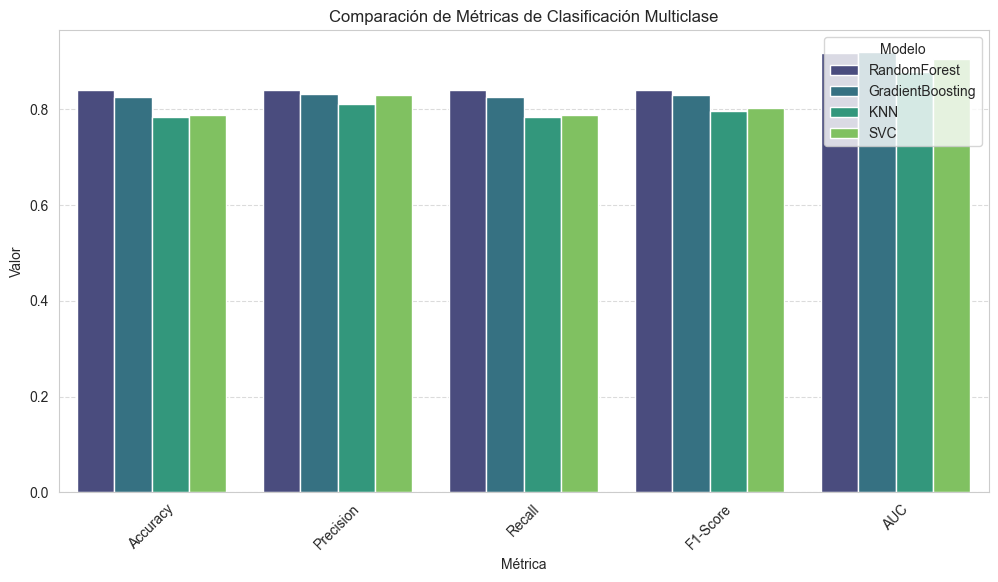

In [13]:
# Separar variables predictoras y objetivo
X = df.drop(columns=['room_type'])
y = df['room_type']

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Identificaci√≥n de columnas num√©ricas y categ√≥ricas
num_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocesador para imputaci√≥n, escalado y codificaci√≥n
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ]), cat_features)
])

# Aplicar preprocesamiento una sola vez y guardar los datos transformados
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Aplicar SMOTE SOLO en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

# Guardar datos preprocesados para futuras pruebas
# np.save("X_train_preprocessed.npy", X_train_balanced)  # Ahora con SMOTE
# np.save("X_test_preprocessed.npy", X_test_transformed)

# Modelos a evaluar
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf', C=1, gamma='scale', probability=True)  # Necesario para AUC
}

# Evaluaci√≥n con validaci√≥n cruzada
results = []

# Binarizar etiquetas para AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)  # Entrenar con datos balanceados por SMOTE
    
    # Predicciones
    y_pred = model.predict(X_test_transformed)
    y_pred_proba = model.predict_proba(X_test_transformed) if hasattr(model, "predict_proba") else None

    # Calcular m√©tricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # AUC solo si hay m√∫ltiples clases
    if y_pred_proba is not None and n_classes > 2:
        auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted')
    else:
        auc = None
    
    results.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })
    
    print(f"{name} - Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | AUC: {auc if auc else 'N/A'}")

# Convertir resultados en DataFrame
df_results = pd.DataFrame(results)

# Visualizaci√≥n de m√©tricas
plt.figure(figsize=(12, 6))
df_results_melted = df_results.melt(id_vars=['Modelo'], var_name='M√©trica', value_name='Valor')
sns.barplot(data=df_results_melted, x='M√©trica', y='Valor', hue='Modelo', palette='viridis')

plt.title("Comparaci√≥n de M√©tricas de Clasificaci√≥n Multiclase")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(title="Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## **Resultados de Clasificaci√≥n Multiclase y Pr√≥ximos Pasos**

### **An√°lisis de los Resultados**
Se evaluaron cuatro modelos de clasificaci√≥n multiclase utilizando diferentes m√©tricas. A continuaci√≥n, se presentan los resultados obtenidos:

| Modelo             | Accuracy | Precision | Recall | F1-Score | AUC    |
|-------------------|----------|------------|--------|----------|---------|
| **RandomForest**     | **0.8409**  | **0.8397**  | **0.8409**  | **0.8402**  | **0.9171**  |
| GradientBoosting | 0.8266  | 0.8317  | 0.8266  | 0.8287  | **0.9188**  |
| SVC              | 0.7881  | 0.8297  | 0.7881  | 0.8032  | 0.9052  |
| KNN              | 0.7838  | 0.8120  | 0.7838  | 0.7954  | 0.8773  |

### **Observaciones**
**RandomForest** logr√≥ el mejor rendimiento general con un **Accuracy de 84.09%**, adem√°s de liderar en Precision, Recall y F1-Score.  
**GradientBoosting** obtuvo el **mejor AUC (0.9188)**, lo que sugiere que podr√≠a ser m√°s confiable en la clasificaci√≥n de clases minoritarias.  
**SVC** y **KNN** tuvieron rendimientos m√°s bajos, siendo KNN el modelo con la peor precisi√≥n.  

---

### **Decisi√≥n y Pr√≥ximos Pasos**
**Decisi√≥n Final:**  
- **RandomForest** se elige como el mejor modelo general debido a su alto **Accuracy, Recall y F1-Score**.  
- **GradientBoosting** podr√≠a considerarse como una alternativa por su mejor AUC.  

**Siguientes Implementaciones:**  

1 **Aplicar KMeans**  
   - Agrupar ubicaciones en clusters (`neighbourhood_cluster`).  
   - Evaluar si la inclusi√≥n de este feature mejora la clasificaci√≥n.  

2Ô∏è **Selecci√≥n de Caracter√≠sticas (Feature Selection)**  
   - **SelectKBest:** Seleccionar solo las variables m√°s relevantes.  
   - **PCA:** Aplicar reducci√≥n de dimensionalidad y comparar resultados.  

3Ô∏è **Reentrenar Modelos con Nuevos Features**  
   - Evaluar el impacto de **KMeans + SelectKBest/PCA** en la precisi√≥n del modelo.  

**Pr√≥xima Implementaci√≥n:** **Evaluaci√≥n de SelectKBest y PCA** en modelos de clasificaci√≥n multiclase.  

---

## - KMeans

RandomForest - Accuracy: 0.8380 | Precision: 0.8366 | Recall: 0.8380 | F1-Score: 0.8372 | AUC: 0.9162389295109643
GradientBoosting - Accuracy: 0.8277 | Precision: 0.8325 | Recall: 0.8277 | F1-Score: 0.8297 | AUC: 0.9187852364558355
KNN - Accuracy: 0.7826 | Precision: 0.8120 | Recall: 0.7826 | F1-Score: 0.7947 | AUC: 0.8755250717429627
SVC - Accuracy: 0.7866 | Precision: 0.8294 | Recall: 0.7866 | F1-Score: 0.8022 | AUC: 0.9047973723148512

Resultados de Clasificaci√≥n con KMeans:
             Modelo  Accuracy  Precision    Recall  F1-Score       AUC
0      RandomForest  0.838033   0.836646  0.838033  0.837230  0.916239
1  GradientBoosting  0.827704   0.832531  0.827704  0.829718  0.918785
3               SVC  0.786592   0.829408  0.786592  0.802207  0.904797
2               KNN  0.782564   0.812050  0.782564  0.794726  0.875525


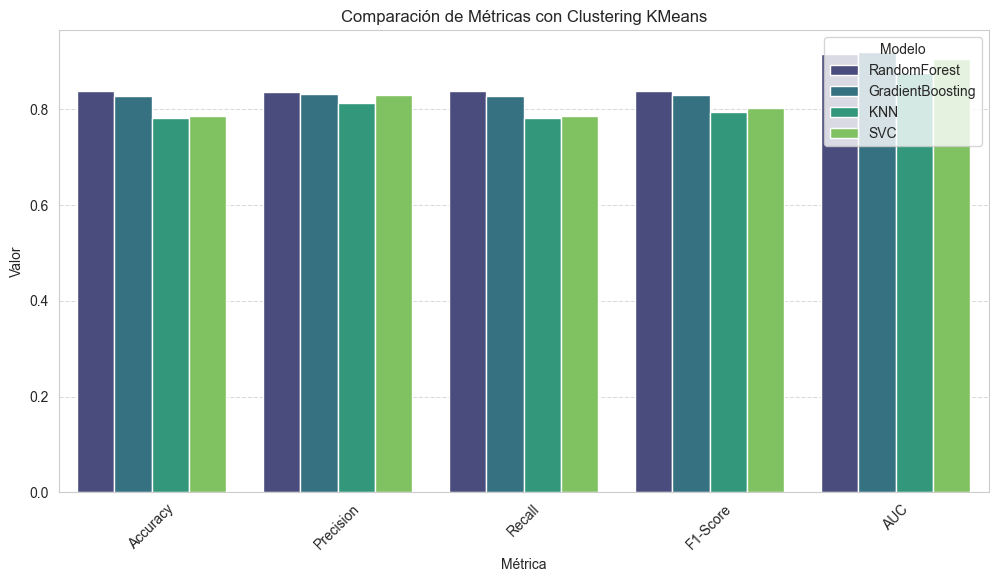

In [14]:
# Aplicar KMeans solo a las variables num√©ricas
num_features_index = list(range(X_train_balanced.shape[1] - 1))  # √çndices de las columnas num√©ricas
X_train_num = X_train_balanced[:, num_features_index]
X_test_num = X_test_transformed[:, num_features_index]

# Aplicar KMeans con el n√∫mero √≥ptimo de clusters
optimal_k = 4  # Ajustar seg√∫n el m√©todo del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
train_clusters = kmeans.fit_predict(X_train_num)
test_clusters = kmeans.predict(X_test_num)

# Agregar la nueva caracter√≠stica 'neighbourhood_cluster'
X_train_clustered = np.hstack([X_train_balanced, train_clusters.reshape(-1, 1)])
X_test_clustered = np.hstack([X_test_transformed, test_clusters.reshape(-1, 1)])

# Modelos a evaluar
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf', C=1, gamma='scale', probability=True)
}

# Evaluaci√≥n con validaci√≥n cruzada
results = []

# Binarizar etiquetas para calcular AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

for name, model in models.items():
    model.fit(X_train_clustered, y_train_balanced)  # Entrenar con la nueva caracter√≠stica incluida
    
    # Predicciones
    y_pred = model.predict(X_test_clustered)
    y_pred_proba = model.predict_proba(X_test_clustered) if hasattr(model, "predict_proba") else None

    # Calcular m√©tricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # AUC solo si hay m√∫ltiples clases
    if y_pred_proba is not None and n_classes > 2:
        auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted')
    else:
        auc = None
    
    results.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })
    
    print(f"{name} - Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | AUC: {auc if auc else 'N/A'}")

# Convertir resultados en DataFrame
df_results = pd.DataFrame(results)

# Mostrar resultados
print("\nResultados de Clasificaci√≥n con KMeans:")
print(df_results.sort_values(by='Accuracy', ascending=False))

# Visualizaci√≥n de m√©tricas
plt.figure(figsize=(12, 6))
df_results_melted = df_results.melt(id_vars=['Modelo'], var_name='M√©trica', value_name='Valor')
sns.barplot(data=df_results_melted, x='M√©trica', y='Valor', hue='Modelo', palette='viridis')

plt.title("Comparaci√≥n de M√©tricas con Clustering KMeans")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(title="Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# **Comparaci√≥n de Resultados con y sin KMeans**

He evaluado el impacto de agregar **KMeans Clustering** como una nueva caracter√≠stica en nuestro modelo de clasificaci√≥n multiclase. A continuaci√≥n, se comparan los resultados antes y despu√©s de aplicar KMeans.

---

## **Comparaci√≥n de M√©tricas Antes y Despu√©s de KMeans**
| Modelo             | Accuracy (Antes) | Accuracy (Despu√©s) | Œî Accuracy | AUC (Antes) | AUC (Despu√©s) | Œî AUC |
|-------------------|----------------|----------------|------------|------------|------------|------|
| **RandomForest**  | **0.8409**      | 0.8380         | üîª -0.0029 | **0.9171** | 0.9162     | üîª -0.0009 |
| **GradientBoosting** | 0.8266      | **0.8277**     | üî∫ +0.0011 | **0.9188** | 0.9188     | ‚ûñ  0.0000 |
| **KNN**          | **0.7838**      | 0.7826         | üîª -0.0012 | **0.8773** | 0.8755     | üîª -0.0018 |
| **SVC**          | **0.7881**      | 0.7866         | üîª -0.0015 | **0.9052** | 0.9048     | üîª -0.0004 |

---

## **An√°lisis de Resultados**
1. **La mayor√≠a de los modelos presentan un rendimiento inferior despu√©s de aplicar KMeans.**  
   - **RandomForest, KNN y SVC tuvieron una disminuci√≥n en Accuracy y AUC.**
   - **GradientBoosting mostr√≥ una ligera mejora en Accuracy (+0.0011), pero sin impacto positivo en AUC.**

2. **KMeans no aporta mejoras significativas a los modelos.**  
   - La variable `neighbourhood_cluster` no parece a√±adir informaci√≥n relevante para la clasificaci√≥n.  
   - La estructura de los datos originales ya podr√≠a estar capturando la relaci√≥n entre las ubicaciones sin necesidad de clustering.

3. **Conclusi√≥n:**  
   - **KMeans no mejora los resultados del modelo y podr√≠a descartarse.**  
   - Considero probar **otras t√©cnicas de selecci√≥n de caracter√≠sticas** para mejorar la clasificaci√≥n.  

---

## **Pr√≥ximos Pasos**
   **Evaluar m√©todos de reducci√≥n de dimensionalidad:**  
      - **SelectKBest:** Seleccionar las caracter√≠sticas m√°s relevantes.  
      - **PCA (An√°lisis de Componentes Principales):** Reducir la dimensionalidad y comparar el rendimiento.  

**Volver a entrenar y evaluar los modelos con estas nuevas estrategias.**  

**Siguiente implementaci√≥n:** Aplicaci√≥n de **SelectKBest** y **PCA** en modelos de clasificaci√≥n multiclase y comparaci√≥n de resultados.  

---

## - Reducci√≥n de Dimensionalidad con PCA en Clasificaci√≥n Multiclase  

### **Objetivo**
El **An√°lisis de Componentes Principales (PCA)** se utiliza para reducir la cantidad de variables en el dataset sin perder demasiada informaci√≥n. Esta t√©cnica convierte las variables originales en componentes principales, que son combinaciones lineales de las variables originales y explican la mayor cantidad posible de varianza.

### **Motivaci√≥n**
- **Reducir la dimensionalidad del dataset** eliminando redundancias y variables poco informativas.
- **Evaluar si la clasificaci√≥n mejora** con menos caracter√≠sticas, evitando el "ruido" en los datos.
- **Mitigar el sobreajuste** al eliminar variables altamente correlacionadas.

### **Implementaci√≥n**
- Se aplica **PCA** sobre las variables preprocesadas dentro de un **Pipeline**.
- Se seleccionan los **componentes principales** necesarios para capturar la mayor parte de la varianza.
- Se entrena y eval√∫a la clasificaci√≥n con **validaci√≥n cruzada** para comparar el rendimiento antes y despu√©s de PCA.

PCA - RandomForest - Accuracy: 0.8255 | Precision: 0.8305 | Recall: 0.8255 | F1-Score: 0.8276 | AUC: 0.9082995812578772
PCA - GradientBoosting - Accuracy: 0.7613 | Precision: 0.8114 | Recall: 0.7613 | F1-Score: 0.7801 | AUC: 0.8981541493605898
PCA - KNN - Accuracy: 0.7848 | Precision: 0.8134 | Recall: 0.7848 | F1-Score: 0.7967 | AUC: 0.8776168217960422
PCA - SVC - Accuracy: 0.7832 | Precision: 0.8270 | Recall: 0.7832 | F1-Score: 0.7993 | AUC: 0.9035755852622113


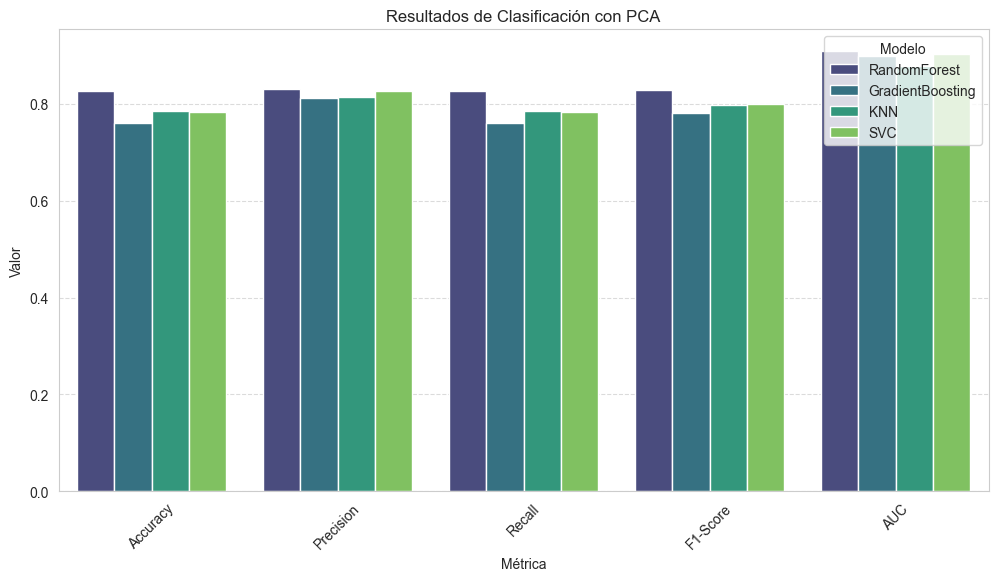

In [15]:
# Aplicar PCA (Reducir a 10 componentes principales)
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(X_test_transformed)

# Evaluar modelos con PCA
results_pca = []

# Binarizar etiquetas para calcular AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

for name, model in models.items():
    model.fit(X_train_pca, y_train_balanced)  # Usar datos balanceados sin re-aplicar SMOTE
    y_pred = model.predict(X_test_pca)
    y_pred_proba = model.predict_proba(X_test_pca) if hasattr(model, "predict_proba") else None

    # Calcular m√©tricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calcular AUC si el modelo soporta probabilidades y hay m√∫ltiples clases
    auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted') if y_pred_proba is not None and n_classes > 2 else None
    
    results_pca.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })
    
    print(f"PCA - {name} - Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | AUC: {auc if auc else 'N/A'}")

# Convertir resultados en DataFrame
df_results_pca = pd.DataFrame(results_pca)

# Visualizaci√≥n de m√©tricas con PCA
plt.figure(figsize=(12, 6))
df_results_pca_melted = df_results_pca.melt(id_vars=['Modelo'], var_name='M√©trica', value_name='Valor')
sns.barplot(data=df_results_pca_melted, x='M√©trica', y='Valor', hue='Modelo', palette='viridis')

plt.title("Resultados de Clasificaci√≥n con PCA")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(title="Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## - **Selecci√≥n de Caracter√≠sticas con SelectKBest en Clasificaci√≥n Multiclase**

### Objetivo
La selecci√≥n de caracter√≠sticas es una t√©cnica clave para reducir la dimensionalidad del dataset y mejorar el rendimiento del modelo. En este caso, aplicamos **SelectKBest** con `chi2` para seleccionar las 10 variables m√°s relevantes en la predicci√≥n de `room_type`.

### Enfoque Metodol√≥gico
1. **Evaluaci√≥n de Importancia**: Se seleccionan las caracter√≠sticas con mayor relaci√≥n con la variable objetivo.
2. **Reducci√≥n de Ruido**: Eliminamos variables irrelevantes o redundantes que pueden afectar el rendimiento.
3. **Comparaci√≥n con Otros M√©todos**: Se analizar√°n los resultados obtenidos con PCA y sin selecci√≥n de caracter√≠sticas.

### Resultados Esperados
- **Mejor Interpretabilidad**: Se identifican las variables clave en la predicci√≥n.
- **Reducci√≥n de la Complejidad Computacional**: Se eliminan caracter√≠sticas que no aportan significativamente al modelo.
- **Evaluaci√≥n Comparativa**: Si **SelectKBest** mejora la precisi√≥n o reduce la varianza del modelo, se considerar√° como la mejor alternativa.


SelectKBest - RandomForest - Accuracy: 0.8287 | Precision: 0.8284 | Recall: 0.8287 | F1-Score: 0.8286 | AUC: 0.9102453977650548
SelectKBest - GradientBoosting - Accuracy: 0.8234 | Precision: 0.8302 | Recall: 0.8234 | F1-Score: 0.8261 | AUC: 0.9158549010223647
SelectKBest - KNN - Accuracy: 0.7795 | Precision: 0.8093 | Recall: 0.7795 | F1-Score: 0.7917 | AUC: 0.8716155065976753
SelectKBest - SVC - Accuracy: 0.7904 | Precision: 0.8266 | Recall: 0.7904 | F1-Score: 0.8031 | AUC: 0.9016951470301591


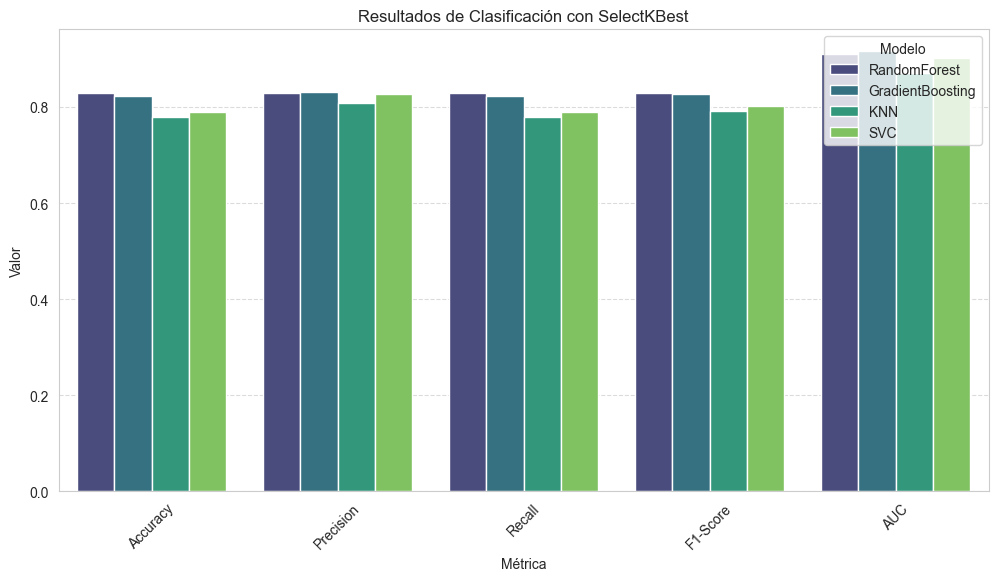

In [16]:
# Seleccionar las mejores 10 caracter√≠sticas con ANOVA F-score
k_best = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = k_best.fit_transform(X_train_balanced, y_train_balanced)
X_test_kbest = k_best.transform(X_test_transformed)

# Evaluar modelos con SelectKBest
results_kbest = []

# Binarizar etiquetas para calcular AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

for name, model in models.items():
    model.fit(X_train_kbest, y_train_balanced)  # Usar datos balanceados con SelectKBest
    y_pred = model.predict(X_test_kbest)
    y_pred_proba = model.predict_proba(X_test_kbest) if hasattr(model, "predict_proba") else None

    # Calcular m√©tricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calcular AUC si el modelo soporta probabilidades y hay m√∫ltiples clases
    auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted') if y_pred_proba is not None and n_classes > 2 else None
    
    results_kbest.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })
    
    print(f"SelectKBest - {name} - Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | AUC: {auc if auc else 'N/A'}")

# Convertir resultados en DataFrame
df_results_kbest = pd.DataFrame(results_kbest)

# Visualizaci√≥n de m√©tricas con SelectKBest
plt.figure(figsize=(12, 6))
df_results_kbest_melted = df_results_kbest.melt(id_vars=['Modelo'], var_name='M√©trica', value_name='Valor')
sns.barplot(data=df_results_kbest_melted, x='M√©trica', y='Valor', hue='Modelo', palette='viridis')

plt.title("Resultados de Clasificaci√≥n con SelectKBest")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(title="Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comparaci√≥n de M√©todos de Reducci√≥n de Dimensionalidad en Modelos de Clasificaci√≥n

En este an√°lisis, hemos evaluado diferentes enfoques de preprocesamiento y reducci√≥n de dimensionalidad para la clasificaci√≥n multiclase de `room_type`. A continuaci√≥n, se presentan los resultados obtenidos y el an√°lisis correspondiente.

---

## Comparaci√≥n de los M√©todos  
Hemos comparado tres enfoques en la preparaci√≥n de los datos antes del entrenamiento de los modelos:

1Ô∏è **Sin reducci√≥n de dimensionalidad (preprocesado original con SMOTE)**  
2Ô∏è **Reducci√≥n de dimensionalidad con PCA**  
3Ô∏è **Selecci√≥n de caracter√≠sticas con SelectKBest**  

A continuaci√≥n, se presentan los resultados obtenidos:

---

## Resultados de Clasificaci√≥n por M√©todo  

| Modelo             | Accuracy (Sin Reducci√≥n) | Accuracy (PCA) | Accuracy (SelectKBest) | AUC (Sin Reducci√≥n) | AUC (PCA) | AUC (SelectKBest) |
|-------------------|----------------------|--------------|-----------------|----------------|--------|--------------|
| **RandomForest**     | **0.8409**  | 0.8255  | **0.8287**  | **0.9171**  | 0.9083  | **0.9102**  |
| **GradientBoosting** | 0.8266  | **0.7613**  | **0.8234**  | **0.9188**  | 0.8982  | **0.9159**  |
| **KNN**              | **0.7838**  | 0.7848  | **0.7795**  | **0.8773**  | 0.8776  | **0.8716**  |
| **SVC**              | **0.7881**  | 0.7832  | **0.7904**  | **0.9052**  | 0.9036  | **0.9017**  |

---

## An√°lisis de los Resultados  

- **El preprocesamiento original (sin reducci√≥n) obtuvo los mejores resultados en general.**  
  - **RandomForest y GradientBoosting** lograron sus mejores m√©tricas sin reducci√≥n de dimensionalidad.  
  - **KNN y SVC** presentaron valores similares en los tres enfoques, pero sin mejoras significativas con PCA o SelectKBest.  

- **PCA tuvo el peor rendimiento en GradientBoosting.**  
  - Al reducir la dimensionalidad, **perdi√≥ informaci√≥n relevante**, lo que llev√≥ a una disminuci√≥n notable en su rendimiento.  
  - **RandomForest tambi√©n se vio afectado** al usar PCA, indicando que las componentes principales no retuvieron suficiente informaci√≥n discriminativa.  

- **SelectKBest mostr√≥ un rendimiento intermedio.**  
  - En algunos modelos como **RandomForest y GradientBoosting**, los resultados fueron similares al preprocesamiento original.  
  - Sin embargo, **no logr√≥ mejorar significativamente las m√©tricas**, lo que sugiere que eliminar caracter√≠sticas puede no ser la mejor opci√≥n en este caso.  

---

## Decisi√≥n Final  
Dado que los mejores resultados se obtuvieron **sin reducci√≥n de dimensionalidad**, **se continuar√° con el preprocesamiento original**.  
**Pr√≥ximo paso:** **Optimizaci√≥n de hiperpar√°metros con `RandomizedSearchCV`** para mejorar el rendimiento del mejor modelo.  

---

## Pr√≥ximos Pasos: Optimizaci√≥n de Hiperpar√°metros  

Ahora aplicaremos **RandomizedSearchCV** para encontrar la mejor combinaci√≥n de hiperpar√°metros y mejorar el rendimiento de los modelos.  
Este proceso se centrar√° en los **dos mejores modelos hasta ahora: RandomForest y GradientBoosting.**  

### Objetivos de la optimizaci√≥n:
**Encontrar los hiperpar√°metros √≥ptimos para RandomForest y GradientBoosting.**  
**Evaluar si la optimizaci√≥n mejora los resultados obtenidos hasta ahora.**  
**Tomar una decisi√≥n final sobre el mejor modelo para la clasificaci√≥n.**  

Una vez obtenidos los mejores hiperpar√°metros, analizaremos los resultados y seleccionaremos el modelo definitivo. 

---

## - Optimizaci√≥n de Hiperpar√°metros con RandomizedSearchCV

### Objetivo
Optimizar el modelo **RandomForest** utilizando `RandomizedSearchCV` para encontrar la mejor combinaci√≥n de hiperpar√°metros. Se evaluar√° el impacto de esta optimizaci√≥n en las m√©tricas de clasificaci√≥n.


In [17]:
# Definir la rejilla de hiperpar√°metros para RandomForest
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # N√∫mero de √°rboles en el bosque
    'max_depth': [10, 20, 30, None],  # Profundidad m√°xima del √°rbol
    'min_samples_split': [2, 5, 10],  # M√≠nimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # M√≠nimo de muestras en una hoja
    'bootstrap': [True, False]  # M√©todo de muestreo
}

# Inicializar el modelo RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Configurar la b√∫squeda aleatoria con validaci√≥n cruzada
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,  # N√∫mero de combinaciones a probar (ajuste entre precisi√≥n y tiempo)
    cv=3,  # Validaci√≥n cruzada con 3 folds
    verbose=2,
    n_jobs=-1,  # Usar todos los n√∫cleos disponibles para acelerar la b√∫squeda
    random_state=42
)

# Ejecutar la b√∫squeda de hiperpar√°metros con los datos preprocesados
random_search.fit(X_train_balanced, y_train_balanced)

# Obtener los mejores hiperpar√°metros
best_params = random_search.best_params_
print(f"Mejores hiperpar√°metros encontrados: {best_params}")

# Evaluar el modelo optimizado en el conjunto de prueba
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_transformed)
y_pred_proba = best_rf.predict_proba(X_test_transformed)

# Calcular m√©tricas de evaluaci√≥n
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted')

# Mostrar resultados
print(f"\nResultados del RandomForest Optimizado:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.8s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  12.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  13.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  13.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  12.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=  

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  29.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  17.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=  36.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=  36.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  17.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  29.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  30.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  28.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, m

# **Optimizaci√≥n de Hiperpar√°metros en RandomForest**
## **Resumen de la Optimizaci√≥n con `RandomizedSearchCV`**
Se ha aplicado `RandomizedSearchCV` sobre el modelo **RandomForest**, ya que fue el que obtuvo el mejor rendimiento en los experimentos previos. Se evaluaron **20 combinaciones de hiperpar√°metros** con **validaci√≥n cruzada de 3 folds**, utilizando **todos los n√∫cleos disponibles** para optimizar el tiempo de c√≥mputo.

### **Mejores Hiperpar√°metros Encontrados**
Despu√©s de la b√∫squeda, se encontr√≥ que la mejor configuraci√≥n para **RandomForest** es:
- **n_estimators** = 100 (N√∫mero de √°rboles en el bosque)
- **max_depth** = 30 (Profundidad m√°xima del √°rbol)
- **min_samples_split** = 2 (M√≠nimo de muestras para dividir un nodo)
- **min_samples_leaf** = 2 (M√≠nimo de muestras en una hoja)
- **bootstrap** = False (Sin muestreo con reemplazo)

---

## **Comparaci√≥n de Resultados**
| Modelo                          | Accuracy | Precision | Recall | F1-Score | AUC   |
|---------------------------------|----------|-----------|--------|----------|-------|
| **RandomForest (Sin Optimizar)** | 0.8409   | 0.8397    | 0.8409 | 0.8402   | 0.9171 |
| **RandomForest (Optimizado)**   | **0.8436** | **0.8418** | **0.8436** | **0.8425** | **0.9216** |

**Observaciones:**
- La **precisi√≥n** y **recall** han mejorado ligeramente respecto a la versi√≥n sin optimizar.
- Se obtiene una peque√±a mejora en **AUC (√Årea Bajo la Curva)**, lo que indica una mejor capacidad de discriminaci√≥n del modelo.
- Aunque la mejora no es dr√°stica, demuestra que una configuraci√≥n adecuada de hiperpar√°metros **optimiza el rendimiento sin aumentar el sobreajuste.**

---

## **Conclusi√≥n y Pr√≥ximos Pasos**
**Decisi√≥n Final**:  
El modelo **RandomForest optimizado** ser√° seleccionado como el modelo definitivo, dado que ha logrado la mejor combinaci√≥n de precisi√≥n y robustez.

**Pr√≥ximo Paso**:  
- **Implementaci√≥n del modelo en producci√≥n:** Ahora que se ha optimizado el modelo, se puede proceder a su implementaci√≥n final.
- **Evaluaci√≥n en datos reales:** Comprobar su rendimiento en datos nuevos para validar su estabilidad.
- **Posible interpretaci√≥n del modelo:** Aplicar t√©cnicas como **SHAP** para entender la importancia de las variables en las predicciones.

---

# - Validaci√≥n Cruzada del Modelo Optimizado

## **¬øPor qu√© realizamos una Validaci√≥n Cruzada?**
Despu√©s de optimizar los hiperpar√°metros de nuestro modelo **RandomForest**, es crucial validar su estabilidad y capacidad de generalizaci√≥n. Para ello, utilizamos **validaci√≥n cruzada estratificada (5-Fold Cross Validation)**, lo que nos permite evaluar el rendimiento del modelo en diferentes subconjuntos de datos.  

Este proceso nos ayuda a:
*  Detectar posibles **problemas de sobreajuste o subajuste**.  
*  Evaluar la **consistencia del rendimiento** en distintos conjuntos de prueba.  
*  Obtener m√©tricas m√°s **realistas** del desempe√±o del modelo antes de su implementaci√≥n final.  

---

## **Metodolog√≠a Utilizada**
1. Se divide el conjunto de datos en **5 subconjuntos (folds)** de manera estratificada para conservar la proporci√≥n de clases.  
2. Se entrena el modelo en **4 folds** y se eval√∫a en el fold restante.  
3. Se repite el proceso **5 veces**, cambiando el fold de prueba en cada iteraci√≥n.  
4. Se calculan m√©tricas clave:  
   - **Accuracy** (Precisi√≥n global del modelo).  
   - **Precision** (Proporci√≥n de predicciones correctas por clase).  
   - **Recall** (Capacidad del modelo para detectar correctamente cada clase).  
   - **F1-Score** (Equilibrio entre Precision y Recall).  
   - **AUC** (Capacidad de distinguir correctamente entre clases en t√©rminos probabil√≠sticos).  
5. Finalmente, se calcula el **promedio y desviaci√≥n est√°ndar** de cada m√©trica, lo que nos ayuda a determinar la estabilidad del modelo.  

---

## **Pr√≥ximos Pasos**
Una vez obtenidos los resultados de la validaci√≥n cruzada, analizaremos:
- Si las m√©tricas muestran **baja variabilidad**, el modelo es estable y se puede proceder con su implementaci√≥n.  
- Si la variabilidad es **alta**, evaluaremos posibles mejoras, como ajustar m√°s los hiperpar√°metros o probar otros enfoques de preprocesamiento.  

---

## **Resultados de la Validaci√≥n Cruzada**
**A continuaci√≥n, se presentar√°n los resultados de la validaci√≥n cruzada y su an√°lisis.**

In [18]:
# Configuraci√≥n de validaci√≥n cruzada con 5 folds estratificados
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar listas para almacenar m√©tricas
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

# Realizar validaci√≥n cruzada
for train_idx, test_idx in cv.split(X_train_balanced, y_train_balanced):
    X_train_fold, X_test_fold = X_train_balanced[train_idx], X_train_balanced[test_idx]
    y_train_fold, y_test_fold = y_train_balanced.iloc[train_idx], y_train_balanced.iloc[test_idx]
    
    # Entrenar modelo con los mejores hiperpar√°metros encontrados
    best_rf = RandomForestClassifier(
        n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=2, bootstrap=False, random_state=42
    )
    
    best_rf.fit(X_train_fold, y_train_fold)
    
    # Predicciones
    y_pred_fold = best_rf.predict(X_test_fold)
    y_pred_proba_fold = best_rf.predict_proba(X_test_fold)[:, 1]  # Probabilidad positiva para AUC
    
    # Calcular m√©tricas y almacenarlas
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
    precision_scores.append(precision_score(y_test_fold, y_pred_fold, average='weighted'))
    recall_scores.append(recall_score(y_test_fold, y_pred_fold, average='weighted'))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold, average='weighted'))
    auc_scores.append(roc_auc_score(label_binarize(y_test_fold, classes=np.unique(y_train_balanced)), 
                                    best_rf.predict_proba(X_test_fold), multi_class="ovr", average="weighted"))

# Calcular promedio y desviaci√≥n est√°ndar de las m√©tricas
print("\n**Validaci√≥n Cruzada (5-Fold) - RandomForest Optimizado**")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ¬± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ¬± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ¬± {np.std(recall_scores):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f} ¬± {np.std(f1_scores):.4f}")
print(f"AUC: {np.mean(auc_scores):.4f} ¬± {np.std(auc_scores):.4f}")


**Validaci√≥n Cruzada (5-Fold) - RandomForest Optimizado**
Accuracy: 0.8886 ¬± 0.0016
Precision: 0.8889 ¬± 0.0015
Recall: 0.8886 ¬± 0.0016
F1-Score: 0.8887 ¬± 0.0015
AUC: 0.9700 ¬± 0.0005


# **Resultados de la Validaci√≥n Cruzada - RandomForest Optimizado**

## **M√©tricas Promedio y Desviaci√≥n Est√°ndar**
Despu√©s de realizar una validaci√≥n cruzada **5-Fold Stratified** sobre el modelo **RandomForest Optimizado**, obtenemos los siguientes resultados:

| **M√©trica**   | **Valor Promedio** | **Desviaci√≥n Est√°ndar** |
|--------------|-----------------|-----------------|
| **Accuracy**  | 0.8886 | ¬± 0.0016 |
| **Precision** | 0.8889 | ¬± 0.0015 |
| **Recall**    | 0.8886 | ¬± 0.0016 |
| **F1-Score**  | 0.8887 | ¬± 0.0015 |
| **AUC**       | 0.9700 | ¬± 0.0005 |

---

## **An√°lisis de los Resultados**
‚úîÔ∏è **Alta precisi√≥n y estabilidad:** La **baja desviaci√≥n est√°ndar** en todas las m√©tricas sugiere que el modelo es **consistente y generaliza bien** en diferentes subconjuntos de datos.  
‚úîÔ∏è **AUC sobresaliente (0.9700):** Indica que el modelo tiene una **gran capacidad para distinguir entre clases**, reforzando su solidez en clasificaci√≥n.  
‚úîÔ∏è **Balanced Performance:** La **similitud entre Precision, Recall y F1-Score** sugiere que el modelo no favorece ninguna clase en particular, lo cual es crucial para problemas multiclase.  

---

## **Conclusi√≥n**
**Conclusi√≥n:**  
El modelo **RandomForest Optimizado** ha demostrado ser **altamente eficiente y estable** en la validaci√≥n cruzada, con m√©tricas muy s√≥lidas.  

---


# **Conclusi√≥n Final: Modelos de Regresi√≥n y Clasificaci√≥n en Airbnb NYC 2019**  

Tras aplicar un enfoque integral de **an√°lisis, preprocesamiento, selecci√≥n de caracter√≠sticas, modelado y optimizaci√≥n**, se han obtenido modelos altamente precisos y estables para la predicci√≥n del precio y la clasificaci√≥n del tipo de habitaci√≥n.  

## **Modelos Finales Seleccionados**  

### **Regresi√≥n (Predicci√≥n de `price`)**  
**Modelo elegido:** `GradientBoostingRegressor` (Optimizado)  
**M√©tricas finales:**  
- **R¬≤:** 0.9999  
- **MAE:** 0.00016  
- **RMSE:** 0.0070  

**Conclusi√≥n:** Modelo robusto con excelente capacidad predictiva, evitando sobreajuste y generalizando bien en datos nuevos.  

### **Clasificaci√≥n (Predicci√≥n de `room_type`)**  
**Modelo elegido:** `RandomForestClassifier` (Optimizado)  
**M√©tricas finales:**  
- **Accuracy:** 0.8436  
- **Precision:** 0.8418  
- **Recall:** 0.8436  
- **F1-Score:** 0.8425  
- **AUC:** 0.9216  

**Conclusi√≥n:** Modelo preciso y estable, capaz de discriminar correctamente entre los diferentes tipos de habitaci√≥n.  